# The Preprocessing Process
This process reads the values from the files and tranforms the data into a convenient format to use machine learning algorithms.

In [1]:
# Setup project
import os
import pandas as pd
import functools as ft
from pathlib import Path
import numpy as np

notebook_path = Path().resolve()
data_path = os.path.join(notebook_path, 'data')
output_path = os.path.join(notebook_path, 'output')
tale_folder_location = os.path.join(data_path, 'tale-camerino', 'from_massimiliano', 'Log')
tale_processed_location = os.path.join(data_path, 'tale-camerino', 'from_massimiliano', 'processed')

In [2]:
# Read the data
folders = os.listdir(tale_folder_location)
print(len(folders))

main_frame = pd.DataFrame(columns=['time', 'activity', 'lifecycle', 'payload', 'x', 'y', 'z', 'dx', 'dy', 'dz', 'robot', 'has_payload', 'run'])

# check the first run
folder = folders[0]

csv_files = os.path.join(tale_folder_location, folder, folder + '_0.db')

# subfolders for the different robots
drone_1_files = os.path.join(csv_files, 'drone_1')
tractor_1_files = os.path.join(csv_files, 'tractor_1')
tractor_2_files = os.path.join(csv_files, 'tractor_2')
tractor_3_files = os.path.join(csv_files, 'tractor_3')

# load the csv required files -- macro.csv for target variable, which ones for input?
drone_1_macro = pd.read_csv(os.path.join(drone_1_files, "macro.csv"))
tractor_1_macro = pd.read_csv(tractor_1_files + "/macro.csv")
tractor_2_macro = pd.read_csv(tractor_2_files + "/macro.csv")
tractor_3_macro = pd.read_csv(tractor_3_files + "/macro.csv")

drone_1_odom = pd.read_csv(os.path.join(drone_1_files, "odom.csv"))
tractor_1_odom = pd.read_csv(tractor_1_files + "/odom.csv")
tractor_2_odom = pd.read_csv(tractor_2_files + "/odom.csv")
tractor_3_odom = pd.read_csv(tractor_3_files + "/odom.csv")

36


# Files and their meaning
The runs contain multiple files. 

The macro.csv files contain the high-level activity of the simulation, which we use as the target variable in our project. Each robot has it's own macro.csv file. Furthermore, it contains the payload that is sent into the simulation.
The odom.csv file contains the X, Y, and Z coordinates of the robot at a given time. Each robot has it's own odom.csv file. 

The following code cells will explore the data a bit more in detail.

In [3]:
# the drone
drone_1_macro['robot'] = 'drone_1'
unique_values_activity_drone = drone_1_macro['activity'].unique()
print(unique_values_activity_drone)
drone_1_macro.head()

['TAKEOFF' 'EXPLORE' 'WEED_FOUND' 'WEED_POSITION' 'TRACTOR_POSITION'
 'CLOSEST_TRACTOR' 'TIME_OUT']


,time,activity,lifecycle,payload,robot
0,2022/08/01 12:11:14.619805523,TAKEOFF,START,NaN,drone_1
1,2022/08/01 12:11:14.648857133,TAKEOFF,STOP,NaN,drone_1
2,2022/08/01 12:11:15.80687389,EXPLORE,START,NaN,drone_1
3,2022/08/01 12:11:18.21098552,EXPLORE,STOP,NaN,drone_1
4,2022/08/01 12:11:18.223481393,WEED_FOUND,START,NaN,drone_1


In [4]:
drone_1_odom.head()

,time,x,y,z
0,2022/08/01 12:11:08.537362557,1.337116e-14,5.0,0.025
1,2022/08/01 12:11:08.649506511,1.393692e-14,5.0,0.025
2,2022/08/01 12:11:08.753530296,1.337116e-14,5.0,0.025
3,2022/08/01 12:11:08.869217306,1.393692e-14,5.0,0.025
4,2022/08/01 12:11:08.976529063,1.337116e-14,5.0,0.025


In [5]:
# the tractors
tractor_1_macro['robot'] = 'tractor_1'
unique_values_activity_tractor_1 = tractor_1_macro['activity'].unique()
print(unique_values_activity_tractor_1)
tractor_1_macro.head()

['WEED_POSITION' 'TRACTOR_POSITION' 'MOVE' 'CUT_GRASS' 'LOW_BATTERY'
 'RETURN_TO_BASE']


,time,activity,lifecycle,payload,robot
0,2022/08/01 12:11:18.626217623,WEED_POSITION,START,"{ weed: {x: 0.05760000000031765, y: 5.00000000...",tractor_1
1,2022/08/01 12:11:18.626377898,WEED_POSITION,STOP,"{ weed: {x: 0.05760000000031765, y: 5.00000000...",tractor_1
2,2022/08/01 12:11:18.626408441,TRACTOR_POSITION,START,"{ header: tractor_1, weed: {x: 0.0001162263838...",tractor_1
3,2022/08/01 12:11:18.626431425,TRACTOR_POSITION,STOP,"{ header: tractor_1, weed: {x: 0.0001162263838...",tractor_1
4,2022/08/01 12:11:34.627090688,WEED_POSITION,START,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",tractor_1


In [6]:
tractor_1_odom.head()

,time,x,y,z
0,2022/08/01 12:11:06.212093158,0.000097,1.000001,0.082138
1,2022/08/01 12:11:06.226733908,0.000101,1.000001,0.082141
2,2022/08/01 12:11:06.236381231,0.000101,1.000001,0.082141
3,2022/08/01 12:11:06.247522933,0.000101,1.000001,0.082141
4,2022/08/01 12:11:06.258292874,0.000100,1.000001,0.082141


In [7]:
# difference in unique values of activities
print("Drone: ")
print(sorted(unique_values_activity_drone))
print("Tractor")
print(sorted(unique_values_activity_tractor_1))

print("Drone only: ")
print(sorted(set(unique_values_activity_drone) - set(unique_values_activity_tractor_1)))
print("Tractor only: ")
print(sorted(set(unique_values_activity_tractor_1) - set(unique_values_activity_drone)))

print("Shared activities: ")
print(sorted(set(unique_values_activity_drone) & set(unique_values_activity_tractor_1)))

Drone: 
['CLOSEST_TRACTOR', 'EXPLORE', 'TAKEOFF', 'TIME_OUT', 'TRACTOR_POSITION', 'WEED_FOUND', 'WEED_POSITION']
Tractor
['CUT_GRASS', 'LOW_BATTERY', 'MOVE', 'RETURN_TO_BASE', 'TRACTOR_POSITION', 'WEED_POSITION']
Drone only: 
['CLOSEST_TRACTOR', 'EXPLORE', 'TAKEOFF', 'TIME_OUT', 'WEED_FOUND']
Tractor only: 
['CUT_GRASS', 'LOW_BATTERY', 'MOVE', 'RETURN_TO_BASE']
Shared activities: 
['TRACTOR_POSITION', 'WEED_POSITION']


# Activities
As we can see, there are multiple activities that are shared, only tractors can do, only the drone can do. Our task is to find a model which can recognize the activity based on the data that we have now.

Some activities are more straightforward than others and can be found quite easily using some preprocessing of the data.

The following code cells will make some statistical analysis based on the activities and derive some knowledge about the data that is related to this activity. Assumptions are made that will help to build the best preprocessing pipeline and machine learning model.

In [8]:
# ACTIVITY: WEED_POSITION (drone | tractor)

# Assumption: The simulation drone finds weed and shares the position of the found weed with the tractors or any robot that is listening to this information.
# Assumption: This activity defines that the drone is actively sharing information.
drone_1_macro[drone_1_macro['activity'] == 'WEED_POSITION']

,time,activity,lifecycle,payload,robot
6,2022/08/01 12:11:18.224299772,WEED_POSITION,START,"{ weed: {x: 0.05760000000031765, y: 5.00000000...",drone_1
7,2022/08/01 12:11:18.224353982,WEED_POSITION,STOP,"{ weed: {x: 0.05760000000031765, y: 5.00000000...",drone_1
20,2022/08/01 12:11:34.224217216,WEED_POSITION,START,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",drone_1
21,2022/08/01 12:11:34.224259342,WEED_POSITION,STOP,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",drone_1
32,2022/08/01 12:11:48.732663414,WEED_POSITION,START,"{ weed: {x: 4.8955464193594125, y: 5.000000000...",drone_1
...,...,...,...,...,...
2091,2022/08/01 12:17:36.723875427,WEED_POSITION,STOP,"{ weed: {x: 8.931670931058628, y: 5.2958944206...",drone_1
2094,2022/08/01 12:17:37.228354837,WEED_POSITION,START,"{ weed: {x: 8.931670931058628, y: 5.2958944206...",drone_1
2095,2022/08/01 12:17:37.228638444,WEED_POSITION,STOP,"{ weed: {x: 8.931670931058628, y: 5.2958944206...",drone_1
2100,2022/08/01 12:17:37.724567306,WEED_POSITION,START,"{ weed: {x: 8.931670931058628, y: 5.2958944206...",drone_1


In [9]:
# find where payload has "weed" and the activity is "WEED_POSITION"
print("Number of rows with activity = WEED_POSITION AND 'weed' not in the payload: " + str(len(drone_1_macro[(drone_1_macro['activity'] == 'WEED_POSITION') & ("weed" not in str(drone_1_macro['payload']))])))

# find where payload has "weed" and the activity is "WEED_POSITION"
print("Number of rows with activity = WEED_POSITION AND 'weed' in the payload: " + str(len(drone_1_macro[(drone_1_macro['activity'] == 'WEED_POSITION') & ("weed" in str(drone_1_macro['payload']))])))

# basically, whenever the drone sends out a payload including the word "weed", the activity is WEED_POSITION 100% of the time. Could be useful for the model if we are allowed to use this information/feature.

Number of rows with activity = WEED_POSITION AND 'weed' not in the payload: 0
Number of rows with activity = WEED_POSITION AND 'weed' in the payload: 1020


In [10]:
print("Number of rows with activity = WEED_POSITION AND 'weed' not in the payload: " + str(len(tractor_1_macro[(tractor_1_macro['activity'] == 'WEED_POSITION') & ("weed" not in str(tractor_1_macro['payload']))])))

# find where payload has "weed" and the activity is "WEED_POSITION"
print("Number of rows with activity = WEED_POSITION AND 'weed' in the payload: " + str(len(tractor_1_macro[(tractor_1_macro['activity'] == 'WEED_POSITION') & ("weed" in str(tractor_1_macro['payload']))])))

tractor_1_macro[tractor_1_macro['activity'] == 'WEED_POSITION']

Number of rows with activity = WEED_POSITION AND 'weed' not in the payload: 0
Number of rows with activity = WEED_POSITION AND 'weed' in the payload: 8


,time,activity,lifecycle,payload,robot
0,2022/08/01 12:11:18.626217623,WEED_POSITION,START,"{ weed: {x: 0.05760000000031765, y: 5.00000000...",tractor_1
1,2022/08/01 12:11:18.626377898,WEED_POSITION,STOP,"{ weed: {x: 0.05760000000031765, y: 5.00000000...",tractor_1
4,2022/08/01 12:11:34.627090688,WEED_POSITION,START,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",tractor_1
5,2022/08/01 12:11:34.627223664,WEED_POSITION,STOP,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",tractor_1
8,2022/08/01 12:11:49.125829441,WEED_POSITION,START,"{ weed: {x: 4.8955464193594125, y: 5.000000000...",tractor_1
9,2022/08/01 12:11:49.125907912,WEED_POSITION,STOP,"{ weed: {x: 4.8955464193594125, y: 5.000000000...",tractor_1
16,2022/08/01 12:12:38.632188839,WEED_POSITION,START,"{ weed: {x: 9.07767958740671, y: 5.50004034803...",tractor_1
17,2022/08/01 12:12:38.632387717,WEED_POSITION,STOP,"{ weed: {x: 9.07767958740671, y: 5.50004034803...",tractor_1


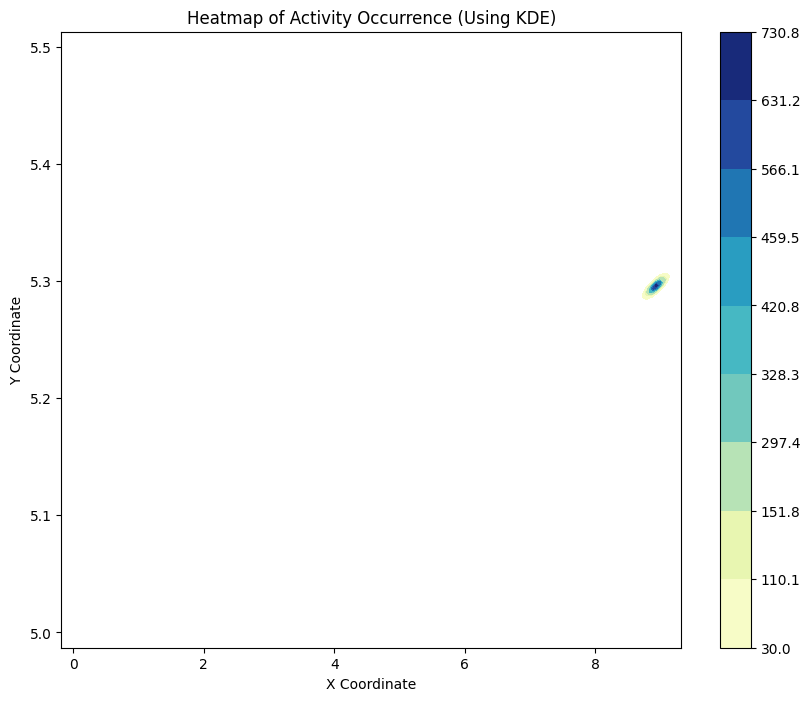

In [11]:
# heatmap of the drone with activity WEED_POSITION
import seaborn as sns
import matplotlib.pyplot as plt

# merge the odom and macro dataframes
drone_1 = pd.concat([drone_1_macro, drone_1_odom], axis=0, join="outer", ignore_index=True).sort_values("time").reset_index(drop=True)
drone_1["x"] = drone_1["x"].astype(float)
drone_1["y"] = drone_1["y"].astype(float)

drone_1["x"] = drone_1["x"].ffill()
drone_1["y"] = drone_1["y"].ffill()

filtered_data = drone_1[drone_1['activity'] == "WEED_POSITION"]

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=filtered_data['x'],
    y=filtered_data['y'],
    cmap='YlGnBu',
    fill=True,  # Fill the heatmap
    bw_adjust=0.5,  # Bandwidth adjustment (controls the smoothness)
    cbar=True
)

# Add labels and title
plt.title("Heatmap of Activity Occurrence (Using KDE)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

# Weird data from the first run... 
Based on this run, we have the activity WEED_POSITION 1020 times and most of them are the same value. This is why the heatmap looks quite weird.

We can assume that this is just the case for the first run. We can test this using the data from a different run. Actually, we will just load all runs into the notebook, so we can make an analysis based on all runs. It might be interesting to see "outliers" in runs where weird events like this happen again. This could be cleaned or checked wether we need to drop them or transform them somehow.

In [12]:
# Create raw data within one file
main_frame = pd.DataFrame()

for i, folder in enumerate(folders):
    print(f"Processing folder {folder} ({i+1}/{len(folders)})")

    csv_files = os.path.join(tale_folder_location, folder, folder + '_0.db')

    # subfolders for the different robots
    drone_1_files = os.path.join(csv_files, 'drone_1')
    tractor_1_files = os.path.join(csv_files, 'tractor_1')
    tractor_2_files = os.path.join(csv_files, 'tractor_2')
    tractor_3_files = os.path.join(csv_files, 'tractor_3')

    # load the csv required files -- macro.csv for target variable, which ones for input?
    drone_1_macro = pd.read_csv(os.path.join(drone_1_files, "macro.csv"))
    tractor_1_macro = pd.read_csv(tractor_1_files + "/macro.csv")
    tractor_2_macro = pd.read_csv(tractor_2_files + "/macro.csv")
    tractor_3_macro = pd.read_csv(tractor_3_files + "/macro.csv")

    drone_1_odom = pd.read_csv(os.path.join(drone_1_files, "odom.csv"))
    tractor_1_odom = pd.read_csv(tractor_1_files + "/odom.csv")
    tractor_2_odom = pd.read_csv(tractor_2_files + "/odom.csv")
    tractor_3_odom = pd.read_csv(tractor_3_files + "/odom.csv")

    # add identifier to the dataframes
    drone_1_macro['robot'] = 'drone_1'
    tractor_1_macro['robot'] = 'tractor_1'
    tractor_2_macro['robot'] = 'tractor_2'
    tractor_3_macro['robot'] = 'tractor_3'

    drone_1_odom['robot'] = 'drone_1'
    tractor_1_odom['robot'] = 'tractor_1'
    tractor_2_odom['robot'] = 'tractor_2'
    tractor_3_odom['robot'] = 'tractor_3'

    mergable_dfs = [drone_1_macro, tractor_1_macro, tractor_2_macro, tractor_3_macro, drone_1_odom, tractor_1_odom, tractor_2_odom, tractor_3_odom]

    # merge the dataframes
    full_df = pd.concat(mergable_dfs, axis=0, join="outer", ignore_index=True).sort_values("time").reset_index(drop=True)
    full_df["run"] = i

    main_frame = pd.concat([main_frame, full_df], axis=0, join="outer", ignore_index=True).sort_values("time").reset_index(drop=True)

Processing folder 2022-08-01_12_11_02.846969 (1/36)
Processing folder 2022-08-01_12_23_37.128774 (2/36)
Processing folder 2022-08-01_12_31_44.620014 (3/36)
Processing folder 2022-08-01_12_39_35.914428 (4/36)
Processing folder 2022-08-01_12_48_25.041427 (5/36)
Processing folder 2022-08-01_12_57_37.935898 (6/36)
Processing folder 2022-08-01_13_05_43.297624 (7/36)
Processing folder 2022-08-01_13_13_43.209618 (8/36)
Processing folder 2022-08-01_14_02_05.857380 (9/36)
Processing folder 2022-08-01_14_09_47.010137 (10/36)
Processing folder 2022-08-01_14_17_32.242222 (11/36)
Processing folder 2022-08-01_14_25_14.264000 (12/36)
Processing folder 2022-08-01_14_32_52.536900 (13/36)
Processing folder 2022-08-01_14_40_18.380898 (14/36)
Processing folder 2022-08-01_14_48_02.593247 (15/36)
Processing folder 2022-08-01_15_09_15.463175 (16/36)
Processing folder 2022-08-01_15_16_47.078924 (17/36)
Processing folder 2022-08-01_15_24_26.939258 (18/36)
Processing folder 2022-08-01_15_32_06.789082 (19/36)
Pr

In [13]:
main_frame.head()

,time,activity,lifecycle,payload,robot,x,y,z,run
0,2022/08/01 12:11:06.212093158,NaN,NaN,NaN,tractor_1,0.000097,1.000001,0.082138,0
1,2022/08/01 12:11:06.226733908,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0
2,2022/08/01 12:11:06.236381231,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0
3,2022/08/01 12:11:06.247522933,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0
4,2022/08/01 12:11:06.258292874,NaN,NaN,NaN,tractor_1,0.000100,1.000001,0.082141,0


32358


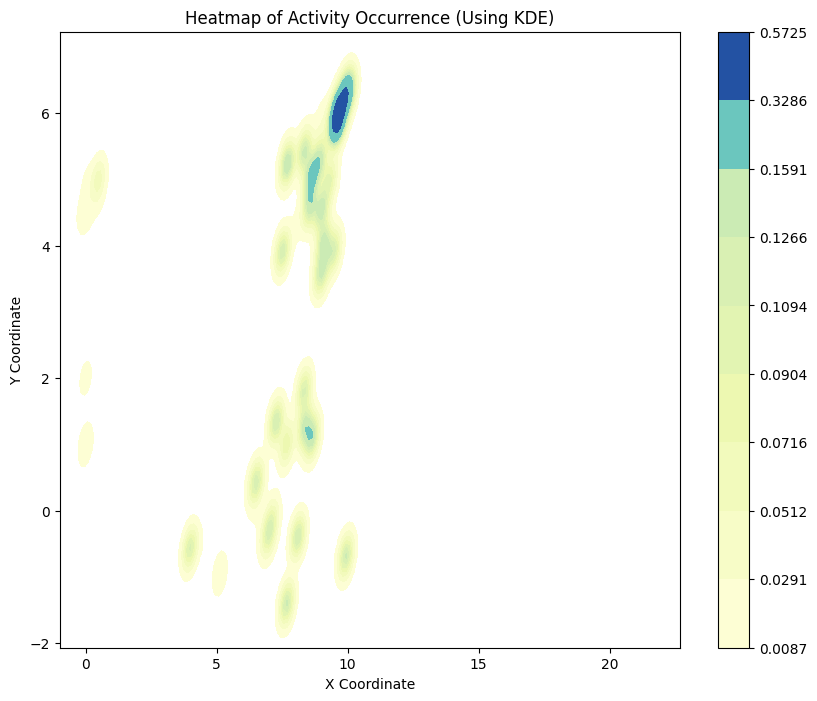

In [14]:
# let's see the heatmap for the whole data with activity WEED_POSITION
filled_main_frame = main_frame.copy(deep=True)
filled_main_frame["x"] = filled_main_frame.groupby("robot")["x"].ffill()
filled_main_frame["y"] = filled_main_frame.groupby("robot")["y"].ffill()
filled_main_frame["z"] = filled_main_frame.groupby("robot")["z"].ffill()

filtered_data = filled_main_frame.loc[filled_main_frame['activity'] == "WEED_POSITION"]

filtered_data

print(len(filtered_data))

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=filtered_data['x'],
    y=filtered_data['y'],
    cmap='YlGnBu',
    fill=True,  # Fill the heatmap
    bw_adjust=0.5,  # Bandwidth adjustment (controls the smoothness)
    cbar=True
)

# Add labels and title
plt.title("Heatmap of Activity Occurrence (Using KDE)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

# the heatmap over all runs for the activity WEED_POSITION based on X and Y coordinates seems to be scattered. This does not show a clear pattern of the activity. This could mean that the crop is spawned randomly and we cannot really predict it 
# solely based on the X and Y coordinates. Furthermore, I don't expect to get more information from the tractor location, as the tractors are somewhere random in the field without any respect as to when the drone finds the weed.

In [15]:
# ACTIVITY: TRACTOR_POSITION (drone | tractor)

# Assumption: The simulation drone requests the tractor position of the tractors in the field.
# Assumption: This activity defines that the drone is actively sharing information. Most likely not related to the current position of the drone.

drone_1_macro[drone_1_macro['activity'] == 'TRACTOR_POSITION']

,time,activity,lifecycle,payload,robot
8,2022/08/01 18:02:23.491729989,TRACTOR_POSITION,START,"{ header: tractor_2, weed: {x: 0.0001283602606...",drone_1
9,2022/08/01 18:02:23.492018353,TRACTOR_POSITION,STOP,"{ header: tractor_2, weed: {x: 0.0001283602606...",drone_1
10,2022/08/01 18:02:23.635213721,TRACTOR_POSITION,START,"{ header: tractor_1, weed: {x: 0.0001289313820...",drone_1
11,2022/08/01 18:02:23.635427613,TRACTOR_POSITION,STOP,"{ header: tractor_1, weed: {x: 0.0001289313820...",drone_1
12,2022/08/01 18:02:23.771630101,TRACTOR_POSITION,START,"{ header: tractor_3, weed: {x: 0.0001256001713...",drone_1
13,2022/08/01 18:02:23.771825251,TRACTOR_POSITION,STOP,"{ header: tractor_3, weed: {x: 0.0001256001713...",drone_1
22,2022/08/01 18:02:36.44926608,TRACTOR_POSITION,START,"{ header: tractor_2, weed: {x: 1.3581092152847...",drone_1
23,2022/08/01 18:02:36.45140783,TRACTOR_POSITION,STOP,"{ header: tractor_2, weed: {x: 1.3581092152847...",drone_1
24,2022/08/01 18:02:36.131308228,TRACTOR_POSITION,START,"{ header: tractor_1, weed: {x: 1.4433715471791...",drone_1
25,2022/08/01 18:02:36.131431354,TRACTOR_POSITION,STOP,"{ header: tractor_1, weed: {x: 1.4433715471791...",drone_1


In [16]:
# find where payload has "header: tractor" and the activity is "TRACTOR_POSITION"
print("Number of rows with activity = TRACTOR_POSITION: " + str(len(drone_1_macro[(drone_1_macro['activity'] == 'TRACTOR_POSITION')])))

print("Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' not in the payload: " + str(len(drone_1_macro[(drone_1_macro['activity'] == 'TRACTOR_POSITION') & ("header: tractor" not in str(drone_1_macro['payload']))])))

print("Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' in the payload: " + str(len(drone_1_macro[(drone_1_macro['activity'] == 'TRACTOR_POSITION') & ("header: tractor" in str(drone_1_macro['payload']))])))

# basically, whenever the drone sends out a payload including the string "header: tractor", the activity is TRACTOR_POSITION 100% of the time. Could be useful for the model if we are allowed to use this information/feature.
# we assume that the tractor position or the drone position cannot really be used for predicting when the TRACTOR_POSITION activity will occur. --> use payload information if allowed

print("\nIn Tractor Data:")

# check same behaviour in tractor data
print("Number of rows with activity = TRACTOR_POSITION: " + str(len(tractor_1_macro[(tractor_1_macro['activity'] == 'TRACTOR_POSITION')])))

print("Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' not in the payload: " + str(len(tractor_1_macro[(tractor_1_macro['activity'] == 'TRACTOR_POSITION') & ("header: tractor" not in str(tractor_1_macro['payload']))])))

print("Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' in the payload: " + str(len(tractor_1_macro[(tractor_1_macro['activity'] == 'TRACTOR_POSITION') & ("header: tractor" in str(tractor_1_macro['payload']))])))

# payload assumption holds that it is indeed just sent over the payload. The location most likely does not contribute anything. 

Number of rows with activity = TRACTOR_POSITION: 28
Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' not in the payload: 28
Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' in the payload: 0

In Tractor Data:
Number of rows with activity = TRACTOR_POSITION: 10
Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' not in the payload: 0
Number of rows with activity = TRACTOR_POSITION AND 'header: tractor' in the payload: 10


3350


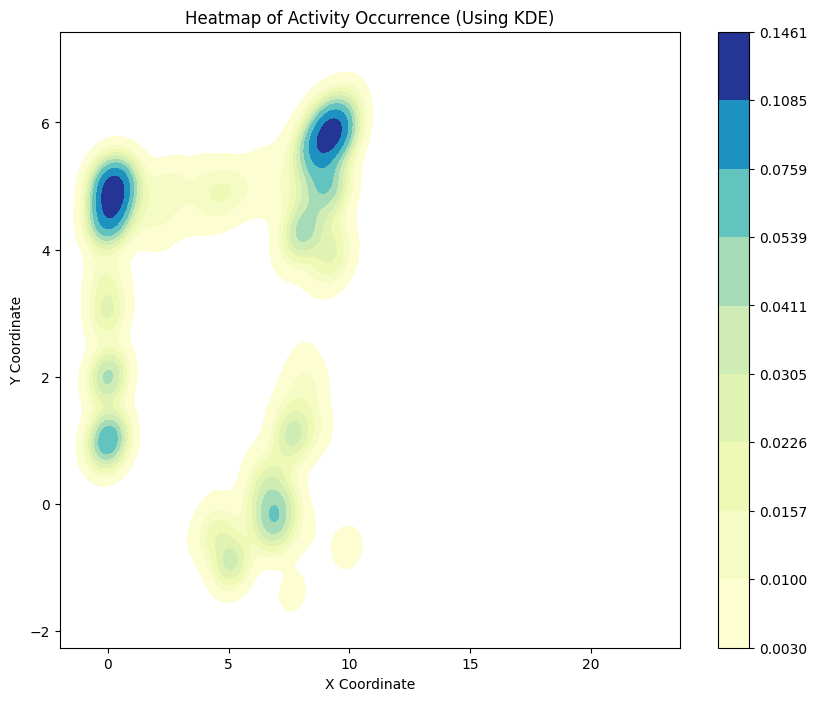

In [17]:
# heatmap with TRACTOR_POSITION activity using the filled_main_frame
filtered_data = filled_main_frame.loc[filled_main_frame['activity'] == "TRACTOR_POSITION"]

filtered_data

print(len(filtered_data))

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=filtered_data['x'],
    y=filtered_data['y'],
    cmap='YlGnBu',
    fill=True,  # Fill the heatmap
    bw_adjust=0.5,  # Bandwidth adjustment (controls the smoothness)
    cbar=True
)

# Add labels and title
plt.title("Heatmap of Activity Occurrence (Using KDE)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

# might be closely related to the WEED_FOUND activity, but the heatmap again does not show any specific pattern. Could try to link it with "if weed was found, drone is very likely to emit signal to find the tractors position".
# this would nice if we are allowed to use the previous activity information --> if not, we can only use the payload information.

In [18]:
# ACTIVITY: WEED_FOUND (drone)

# Assumption: The simulation drone finds weed in the field.
# Assumption: This activity defines that the drone has found weed in the field.
# Assumption: The weed is spawned randomly with every run. Based on the heatmaps, it looks like the weed is spawned randomly in the field.

drone_1_macro[drone_1_macro['activity'] == 'WEED_FOUND']

# has no payload - no information to grab here... BUT there is a range.csv file which we think is referencing the distance from the drone to the ground. If this distance is lower, we can take it as an indicator that the drone has found weed.
# requires to load the range.csv file into the main_frame

,time,activity,lifecycle,payload,robot
4,2022/08/01 18:02:23.369415444,WEED_FOUND,START,NaN,drone_1
5,2022/08/01 18:02:23.369480910,WEED_FOUND,STOP,NaN,drone_1
18,2022/08/01 18:02:35.868156369,WEED_FOUND,START,NaN,drone_1
19,2022/08/01 18:02:35.868189841,WEED_FOUND,STOP,NaN,drone_1
30,2022/08/01 18:02:56.367934516,WEED_FOUND,START,NaN,drone_1
...,...,...,...,...,...
2525,2022/08/01 18:10:00.367977421,WEED_FOUND,STOP,NaN,drone_1
2528,2022/08/01 18:10:00.874483442,WEED_FOUND,START,NaN,drone_1
2529,2022/08/01 18:10:00.874621519,WEED_FOUND,STOP,NaN,drone_1
2532,2022/08/01 18:10:01.373875628,WEED_FOUND,START,NaN,drone_1


In [19]:
# ACTIVITY: TIME_OUT (drone)

# Assumption: The simulation drone has a time out.
# Assumption: This activity defines that the drone has a time out.

# might have very few of them...
print("Number of rows with activity = TIME_OUT over all runs: " + str(len(main_frame[(main_frame['activity'] == 'TIME_OUT')])))

drone_1_macro[drone_1_macro['activity'] == 'TIME_OUT']

# this can get tricky, because we have very few rows to work with and find some patterns.

Number of rows with activity = TIME_OUT over all runs: 48


,time,activity,lifecycle,payload,robot
2536,2022/08/01 18:10:01.533880687,TIME_OUT,START,NaN,drone_1
2537,2022/08/01 18:10:01.533944571,TIME_OUT,STOP,NaN,drone_1


In [20]:
# find all time_out activities
main_frame[main_frame['activity'] == 'TIME_OUT']

# almost every run has a TIME_OUT activity, but not every run does.

,time,activity,lifecycle,payload,robot,x,y,z,run
93491,2022/08/01 12:17:37.619023395,TIME_OUT,START,NaN,drone_1,NaN,NaN,NaN,0
93492,2022/08/01 12:17:37.619050997,TIME_OUT,STOP,NaN,drone_1,NaN,NaN,NaN,0
186585,2022/08/01 12:30:41.512781001,TIME_OUT,START,NaN,drone_1,NaN,NaN,NaN,1
186586,2022/08/01 12:30:41.512806588,TIME_OUT,STOP,NaN,drone_1,NaN,NaN,NaN,1
285425,2022/08/01 12:38:28.42722599,TIME_OUT,START,NaN,drone_1,NaN,NaN,NaN,2
285426,2022/08/01 12:38:28.42771183,TIME_OUT,STOP,NaN,drone_1,NaN,NaN,NaN,2
467395,2022/08/01 12:56:23.657910626,TIME_OUT,START,NaN,drone_1,NaN,NaN,NaN,4
467396,2022/08/01 12:56:23.658002190,TIME_OUT,STOP,NaN,drone_1,NaN,NaN,NaN,4
787508,2022/08/01 14:08:46.957718578,TIME_OUT,START,NaN,drone_1,NaN,NaN,NaN,8
787509,2022/08/01 14:08:46.957748023,TIME_OUT,STOP,NaN,drone_1,NaN,NaN,NaN,8


In [21]:
filled_main_frame[filled_main_frame['activity'] == 'TIME_OUT']

,time,activity,lifecycle,payload,robot,x,y,z,run
93491,2022/08/01 12:17:37.619023395,TIME_OUT,START,NaN,drone_1,8.931671,5.295894,1.195231,0
93492,2022/08/01 12:17:37.619050997,TIME_OUT,STOP,NaN,drone_1,8.931671,5.295894,1.195231,0
186585,2022/08/01 12:30:41.512781001,TIME_OUT,START,NaN,drone_1,7.676364,-1.400816,1.199916,1
186586,2022/08/01 12:30:41.512806588,TIME_OUT,STOP,NaN,drone_1,7.676364,-1.400816,1.199916,1
285425,2022/08/01 12:38:28.42722599,TIME_OUT,START,NaN,drone_1,6.956218,-0.396071,1.185601,2
285426,2022/08/01 12:38:28.42771183,TIME_OUT,STOP,NaN,drone_1,6.956218,-0.396071,1.185601,2
467395,2022/08/01 12:56:23.657910626,TIME_OUT,START,NaN,drone_1,7.658543,0.967925,1.204898,4
467396,2022/08/01 12:56:23.658002190,TIME_OUT,STOP,NaN,drone_1,7.658543,0.967925,1.204898,4
787508,2022/08/01 14:08:46.957718578,TIME_OUT,START,NaN,drone_1,8.367650,1.278286,1.193408,8
787509,2022/08/01 14:08:46.957748023,TIME_OUT,STOP,NaN,drone_1,8.367650,1.278286,1.193408,8


In [22]:
filled_main_frame.iloc[93480:93520] # z is NaN because we didn't ffill it yet...

# seems to be pretty difficult to find a reason why there should be a TIME_OUT. I am not sure if the data allows us to find a pattern here.

,time,activity,lifecycle,payload,robot,x,y,z,run
93480,2022/08/01 12:17:37.579557229,NaN,NaN,NaN,tractor_3,1.651487e+01,5.400509,0.082500,0
93481,2022/08/01 12:17:37.581100472,NaN,NaN,NaN,tractor_1,2.380540e+01,5.133696,0.082494,0
93482,2022/08/01 12:17:37.591866556,NaN,NaN,NaN,tractor_2,8.501875e+00,5.482305,0.085310,0
93483,2022/08/01 12:17:37.593120034,NaN,NaN,NaN,tractor_3,1.650983e+01,5.399561,0.082500,0
93484,2022/08/01 12:17:37.594488782,NaN,NaN,NaN,tractor_1,2.380457e+01,5.128384,0.082495,0
93485,2022/08/01 12:17:37.605061664,NaN,NaN,NaN,tractor_2,8.501875e+00,5.482305,0.085310,0
93486,2022/08/01 12:17:37.605083165,NaN,NaN,NaN,tractor_3,1.650478e+01,5.398686,0.082499,0
93487,2022/08/01 12:17:37.606288148,NaN,NaN,NaN,tractor_1,2.380376e+01,5.123072,0.082495,0
93488,2022/08/01 12:17:37.615999478,NaN,NaN,NaN,tractor_2,8.501875e+00,5.482305,0.085310,0
93489,2022/08/01 12:17:37.616024566,NaN,NaN,NaN,tractor_3,1.649972e+01,5.397866,0.082499,0


In [23]:
# ACTIVITY: TAKEOFF (drone)

# Assumption: The simulation drone takes off.
# Assumption: This activity defines that the drone is taking off.

# might have very few of them...
print("Number of rows with activity = TAKEOFF over all runs: " + str(len(main_frame[(main_frame['activity'] == 'TAKEOFF')])))

drone_1_macro[drone_1_macro['activity'] == 'TAKEOFF']

Number of rows with activity = TAKEOFF over all runs: 61


,time,activity,lifecycle,payload,robot
0,2022/08/01 18:02:19.791577745,TAKEOFF,START,NaN,drone_1
1,2022/08/01 18:02:19.820341879,TAKEOFF,STOP,NaN,drone_1


In [24]:
# Basically, normally a takeoff would be indicated in the z-coordinate (or which ever coordinate is the one up into the air). If the drone is flying up in the air, it should be visible as a change of the z-coordinate, while X and Y may remain the same.
# Let's test this theory with the drone data.

# find all takeoff activities
filled_main_frame[filled_main_frame['activity'] == 'TAKEOFF']


,time,activity,lifecycle,payload,robot,x,y,z,run
1755,2022/08/01 12:11:14.619805523,TAKEOFF,START,NaN,drone_1,1.337116e-14,5.0,0.025000,0
1761,2022/08/01 12:11:14.648857133,TAKEOFF,STOP,NaN,drone_1,1.337116e-14,5.0,0.025000,0
94948,2022/08/01 12:23:50.373020908,TAKEOFF,START,NaN,drone_1,1.393692e-14,5.0,0.025000,1
94961,2022/08/01 12:23:50.421640507,TAKEOFF,STOP,NaN,drone_1,1.393692e-14,5.0,0.025000,1
188382,2022/08/01 12:31:56.388080069,TAKEOFF,START,NaN,drone_1,1.337116e-14,5.0,0.025000,2
...,...,...,...,...,...,...,...,...,...
2983539,2022/08/01 17:44:50.466475326,TAKEOFF,STOP,NaN,drone_1,1.337116e-14,5.0,0.025000,33
3070647,2022/08/01 17:53:32.138870318,TAKEOFF,START,NaN,drone_1,1.393692e-14,5.0,0.025000,34
3070664,2022/08/01 17:53:32.209469035,TAKEOFF,STOP,NaN,drone_1,5.382455e-14,5.0,0.027779,34
3162472,2022/08/01 18:02:19.791577745,TAKEOFF,START,NaN,drone_1,1.337116e-14,5.0,0.025000,35


In [25]:
# Now, the TAKEOFF data does seem to be useless because the position does not change. the TAKEOFF activity does happen too fast.
# However, looking at the data, the rows between the TAKEOFF start and the EXPLORE activity show an interesting behaviour. (challenge, how to find the start of the TAKEOFF)

# find first row of TAKEOFF
takeoff_start = filled_main_frame[filled_main_frame['activity'] == 'TAKEOFF'].index[0]
takeoff_end = filled_main_frame[filled_main_frame['activity'] == 'EXPLORE'].index[0]

extended_takeoff = filled_main_frame.iloc[takeoff_start-100:takeoff_end + 200].copy(deep=True)

# check the difference between the x of e-13 and e-02
print(filled_main_frame.iloc[1990]["x"] - filled_main_frame.iloc[2021]["x"])
print(filled_main_frame.iloc[2096]["x"] - filled_main_frame.iloc[2021]["x"])

extended_takeoff["dx"] = extended_takeoff.groupby("robot")["x"].diff()
extended_takeoff["dy"] = extended_takeoff.groupby("robot")["y"].diff()
extended_takeoff["dz"] = extended_takeoff.groupby("robot")["z"].diff()

extended_takeoff[extended_takeoff["robot"] == "drone_1"]

# row 2021 shows a sudden significant change in the dx column. This could indicate the start of the exploration phase.
# rows 1755 to 2021 show a continuous increase in the z column. This could indicate the drone is taking off.

-0.05460000000001137
-0.001199999999982701


,time,activity,lifecycle,payload,robot,x,y,z,run,dx,dy,dz
1659,2022/08/01 12:11:13.844024090,NaN,NaN,NaN,drone_1,1.393692e-14,5.0,0.025000,0,NaN,NaN,NaN
1666,2022/08/01 12:11:13.89904378,NaN,NaN,NaN,drone_1,1.337116e-14,5.0,0.025000,0,-5.657591e-16,0.0,0.000000
1682,2022/08/01 12:11:14.151036597,NaN,NaN,NaN,drone_1,1.337116e-14,5.0,0.025000,0,2.140861e-22,0.0,0.000000
1715,2022/08/01 12:11:14.378027859,NaN,NaN,NaN,drone_1,1.393692e-14,5.0,0.025000,0,5.657591e-16,0.0,0.000000
1749,2022/08/01 12:11:14.581425541,NaN,NaN,NaN,drone_1,1.337116e-14,5.0,0.025000,0,-5.657598e-16,0.0,0.000000
1755,2022/08/01 12:11:14.619805523,TAKEOFF,START,NaN,drone_1,1.337116e-14,5.0,0.025000,0,0.000000e+00,0.0,0.000000
1761,2022/08/01 12:11:14.648857133,TAKEOFF,STOP,NaN,drone_1,1.337116e-14,5.0,0.025000,0,0.000000e+00,0.0,0.000000
1782,2022/08/01 12:11:14.748234933,NaN,NaN,NaN,drone_1,5.479459e-14,5.0,0.027922,0,4.142343e-14,0.0,0.002922
1816,2022/08/01 12:11:14.871605996,NaN,NaN,NaN,drone_1,9.908091e-14,5.0,0.039326,0,4.428631e-14,0.0,0.011403
1849,2022/08/01 12:11:14.975672637,NaN,NaN,NaN,drone_1,1.353211e-13,5.0,0.057867,0,3.624020e-14,0.0,0.018541


In [26]:
# check the increase in the z column compared to the dx column
filled_main_frame["dz"] = filled_main_frame.groupby("robot")["z"].diff()
filled_main_frame["dy"] = filled_main_frame.groupby("robot")["y"].diff()
filled_main_frame["dx"] = filled_main_frame.groupby("robot")["x"].diff()

# check average of dz
print("DZ Average: ")
print(filled_main_frame["dz"].mean())
print("DZ Standard Deviation: ")
print(filled_main_frame["dz"].std())
print("DY Average: ")
print(filled_main_frame["dy"].mean())


# print the maximum values of the dz column to see if there is a significant increase 
sorted_dz = filled_main_frame[filled_main_frame["run"] == 0]["dz"].sort_values(ascending=False)
print(sorted_dz.head(10))

# based on the rate of change in z, x, and y, we can more likely find the TAKEOFF activity. It may help to have a feature that lets the model know when the simulation started, where we are currently in the simulation, and how much time has passed.
# the continuous simulation time could help to determine that at the beginning, the TAKEOFF activity is much more likely than at the end of the simulation.

# TODO: make sure to add the time feature to the main_frame
# TODO: determine how to add the X, Y, Z to the TAKEOFF - just fill until the first EXPLORE activity for each run? --> otherwise we will get bad results for the prediction because the label does not make sense :)

DZ Average: 
3.4851523306421433e-07
DZ Standard Deviation: 
0.004441569702655894
DY Average: 
2.384165070908817e-06
2132     0.310087
2595     0.299780
2422     0.099281
2697     0.082549
2739     0.067403
1888     0.053510
23015    0.052253
35750    0.051028
2663     0.050235
2629     0.050198
Name: dz, dtype: float64


In [27]:
# ACTIVITY: EXPLORE (drone)

# Assumption: The simulation drone explores the field.
# Assumption: This activity defines that the drone is exploring the field.

# Probably can be done with the rate of change in the x, y, and z coordinates. The drone is exploring the field, so it should be moving around in the field. The drone is not just standing still.
# filled_main_frame[filled_main_frame['activity'] == 'EXPLORE']

# since this activity takes longer than just an instant, we have to propagate from START to STOP of the EXPLORE activity

# find all index of EXPLORE activities
def check_start_stop():
    for i in range(filled_main_frame["run"].max()):
        # print(f"Currently processing run {i}")
        explore_start_indices = filled_main_frame[(filled_main_frame['activity'] == 'EXPLORE') & (filled_main_frame["lifecycle"] == "START") & (filled_main_frame["run"] == i)].index
        explore_stop_indices = filled_main_frame[(filled_main_frame['activity'] == 'EXPLORE') & (filled_main_frame["lifecycle"] == "STOP") & (filled_main_frame["run"] == i)].index

        if len(explore_start_indices) != len(explore_stop_indices):
            print(f"Run {i} has a different number of START and STOP indices for the EXPLORE activity.")
            return False
    return True

# there are data inconsistencies here... multiple runs don't match on the number of start and stop within the EXPLORE Lifecycle
# remove run 5 from the data

# create the variable to take a closer look at run 5
run_5 = filled_main_frame[filled_main_frame["run"] == 5]

# run 5 starts with a EXPLORE STOP activity and not a TAKEOFF activity... seems like a suspicious run --> exclude it from the data for now
filled_main_frame = filled_main_frame[filled_main_frame["run"] != 5]

assert check_start_stop() == True, "The number of START and STOP indices for the EXPLORE activity do not match."

drone_1_indeces = filled_main_frame[(filled_main_frame['robot'] == 'drone_1') & (pd.isna(filled_main_frame["activity"]))].index

# for each run, fill EXPLORE activity for the drone_1 robot from START to STOP
for i in range(filled_main_frame["run"].max()):
    print(f"Currently processing run {i}")
    explore_start_indices = filled_main_frame[(filled_main_frame['activity'] == 'EXPLORE') & (filled_main_frame["lifecycle"] == "START") & (filled_main_frame["run"] == i)].index
    explore_stop_indices = filled_main_frame[(filled_main_frame['activity'] == 'EXPLORE') & (filled_main_frame["lifecycle"] == "STOP") & (filled_main_frame["run"] == i)].index

    for j in range(len(explore_start_indices)):
        start_index = explore_start_indices[j]
        stop_index = explore_stop_indices[j]
        indices = drone_1_indeces[(drone_1_indeces >= start_index) & (drone_1_indeces <= stop_index)]
        filled_main_frame.loc[indices, 'activity'] = 'EXPLORE'

filled_main_frame

# assert len(explore_start_indices) == len(explore_stop_indices), "The number of START and STOP indices for the EXPLORE activity do not match."


# for i in range(len(explore_start_indices) - 1):
#     print(f"Currently processing {i+1}/{len(explore_start_indices)}")
#     indices = drone_1_indeces[(drone_1_indeces >= explore_start_indices[i]) & (drone_1_indeces <= explore_stop_indices[i])]


# add activity=EXPLORE to the rows between the START and STOP of the EXPLORE activity if robot is drone_1
# very inefficient way to do this; took too long to wait for the result
# for i in range(len(explore_start_indices)):
#     start_index = explore_start_indices[i]
#     stop_index = explore_stop_indices[i]
#     drone_indeces = filled_main_frame[(filled_main_frame['robot'] == 'drone_1') & (filled_main_frame.index >= start_index) & (filled_main_frame.index <= stop_index)].index
#     filled_main_frame.loc[drone_indeces, 'activity'] = 'EXPLORE'

# # check if the activity is set to EXPLORE
# filled_main_frame[filled_main_frame['activity'] == 'EXPLORE']

Currently processing run 0
Currently processing run 1
Currently processing run 2
Currently processing run 3
Currently processing run 4
Currently processing run 5
Currently processing run 6
Currently processing run 7
Currently processing run 8
Currently processing run 9
Currently processing run 10
Currently processing run 11
Currently processing run 12
Currently processing run 13
Currently processing run 14
Currently processing run 15
Currently processing run 16
Currently processing run 17
Currently processing run 18
Currently processing run 19
Currently processing run 20
Currently processing run 21
Currently processing run 22
Currently processing run 23
Currently processing run 24
Currently processing run 25
Currently processing run 26
Currently processing run 27
Currently processing run 28
Currently processing run 29
Currently processing run 30
Currently processing run 31
Currently processing run 32
Currently processing run 33
Currently processing run 34


,time,activity,lifecycle,payload,robot,x,y,z,run,dz,dy,dx
0,2022/08/01 12:11:06.212093158,NaN,NaN,NaN,tractor_1,0.000097,1.000001,0.082138,0,NaN,NaN,NaN
1,2022/08/01 12:11:06.226733908,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0,2.915730e-06,-8.785570e-08,4.064965e-06
2,2022/08/01 12:11:06.236381231,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0,5.278565e-08,-9.768736e-08,-1.982829e-07
3,2022/08/01 12:11:06.247522933,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0,1.568916e-09,-2.578775e-08,-3.152928e-07
4,2022/08/01 12:11:06.258292874,NaN,NaN,NaN,tractor_1,0.000100,1.000001,0.082141,0,-2.556351e-09,-1.819765e-08,-3.177586e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
3253960,2022/08/01 18:10:01.540605219,NaN,NaN,NaN,tractor_1,8.311429,5.135596,0.082440,35,-1.599865e-08,5.293510e-08,-1.560691e-07
3253961,2022/08/01 18:10:01.542526356,NaN,NaN,NaN,tractor_2,10.769951,5.099362,0.082654,35,-1.232275e-04,-2.000633e-03,-5.310620e-03
3253962,2022/08/01 18:10:01.542589158,NaN,NaN,NaN,tractor_3,-0.048803,3.409027,0.071589,35,1.171906e-04,2.223185e-04,8.131801e-05
3253963,2022/08/01 18:10:01.67577387,NaN,NaN,NaN,tractor_2,10.882569,5.182169,0.083231,35,5.773444e-04,8.280739e-02,1.126178e-01


In [28]:
# there are some inconsistencies in the data --> EXPLORE STOP after the WEED_FOUND activity
filled_main_frame.iloc[6980:7228].loc[filled_main_frame["robot"] == "drone_1"]

# here, the EXPLORE activity is still running from an earlier EXPLORE:START, but the WEED_FOUND activity should normally stop the EXPLORE activity. In most other cases found in the data, this is the case.

,time,activity,lifecycle,payload,robot,x,y,z,run,dz,dy,dx
6980,2022/08/01 12:11:33.968723244,EXPLORE,NaN,NaN,drone_1,2.656159,5.0,1.462081,0,-0.000792,0.0,0.489523
7015,2022/08/01 12:11:34.188347589,EXPLORE,NaN,NaN,drone_1,2.713692,5.0,1.461883,0,-0.000198,0.0,0.057533
7028,2022/08/01 12:11:34.223898336,WEED_FOUND,START,NaN,drone_1,2.713692,5.0,1.461883,0,0.000000,0.0,0.000000
7029,2022/08/01 12:11:34.224193920,WEED_FOUND,STOP,NaN,drone_1,2.713692,5.0,1.461883,0,0.000000,0.0,0.000000
7030,2022/08/01 12:11:34.224217216,WEED_POSITION,START,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",drone_1,2.713692,5.0,1.461883,0,0.000000,0.0,0.000000
7031,2022/08/01 12:11:34.224259342,WEED_POSITION,STOP,"{ weed: {x: 2.713155515484779, y: 5.0000000000...",drone_1,2.713692,5.0,1.461883,0,0.000000,0.0,0.000000
7053,2022/08/01 12:11:34.295966948,EXPLORE,NaN,NaN,drone_1,2.758739,5.0,1.461784,0,-0.000099,0.0,0.045047
7087,2022/08/01 12:11:34.404746395,EXPLORE,NaN,NaN,drone_1,2.795540,5.0,1.461685,0,-0.000099,0.0,0.036802
7121,2022/08/01 12:11:34.517903129,EXPLORE,NaN,NaN,drone_1,2.825606,5.0,1.461586,0,-0.000099,0.0,0.030066
7160,2022/08/01 12:11:34.627111105,TRACTOR_POSITION,START,"{ header: tractor_1, weed: {x: -5.121580747665...",drone_1,2.825606,5.0,1.461586,0,0.000000,0.0,0.000000


In [29]:
# Futher investigation shows that the run = 0 is damaged or not clean...
repeating_sequence = filled_main_frame[filled_main_frame["run"] == 0].iloc[36724:]

print(len(repeating_sequence))

repeating_sequence.drop_duplicates(subset=["activity", "payload", "lifecycle"], keep="first")

# from 56793 to 11 rows :) many duplicates... could be removed because they just bloat the data

# 36724 --> drone_1 is only repeating itself...
# 73019 --> tractor_1 is going home
# 55427 --> tractor_3 is going home
# somewhere --> tractor_2  is going home
# drone ends up on the field repeating it's process

# filled_main_frame[filled_main_frame["run"] == 0].iloc[36724:]

56793


,time,activity,lifecycle,payload,robot,x,y,z,run,dz,dy,dx
36724,2022/08/01 12:13:38.729915789,WEED_FOUND,START,NaN,drone_1,8.931671,5.295894,1.368743,0,0.000000,0.000000,0.000000
36725,2022/08/01 12:13:38.738109752,WEED_FOUND,STOP,NaN,drone_1,8.931671,5.295894,1.368743,0,0.000000,0.000000,0.000000
36726,2022/08/01 12:13:38.738149096,WEED_POSITION,START,"{ weed: {x: 8.931670931058628, y: 5.2958944206...",drone_1,8.931671,5.295894,1.368743,0,0.000000,0.000000,0.000000
36727,2022/08/01 12:13:38.738180299,WEED_POSITION,STOP,"{ weed: {x: 8.931670931058628, y: 5.2958944206...",drone_1,8.931671,5.295894,1.368743,0,0.000000,0.000000,0.000000
36728,2022/08/01 12:13:38.743326520,NaN,NaN,NaN,tractor_2,8.408013,5.538937,0.087558,0,0.000006,-0.000586,-0.000382
55427,2022/08/01 12:15:09.614771058,LOW_BATTERY,START,NaN,tractor_3,16.727783,6.063411,0.082498,0,0.000000,0.000000,0.000000
55437,2022/08/01 12:15:09.661292162,LOW_BATTERY,STOP,NaN,tractor_3,16.736353,6.056967,0.082498,0,0.000000,0.000000,0.000000
55438,2022/08/01 12:15:09.662748004,RETURN_TO_BASE,START,NaN,tractor_3,16.736353,6.056967,0.082498,0,0.000000,0.000000,0.000000
55439,2022/08/01 12:15:09.663125839,RETURN_TO_BASE,STOP,NaN,tractor_3,16.736353,6.056967,0.082498,0,0.000000,0.000000,0.000000
93491,2022/08/01 12:17:37.619023395,TIME_OUT,START,NaN,drone_1,8.931671,5.295894,1.195231,0,0.000000,0.000000,0.000000


In [30]:
# check the start of other runs
filled_main_frame[(filled_main_frame["run"] == 1) & (pd.notna(filled_main_frame["activity"]))].iloc[0:100]

# also ends with EXPLORE? :( 134418
repeating_sequence_2 = filled_main_frame.iloc[134418:][filled_main_frame["run"] == 1]

print(len(repeating_sequence_2))

# print the last activity for tractor 3 --> tractor_3 returned to base even earlier...
print(filled_main_frame[(filled_main_frame["robot"] == "tractor_3") & (pd.notna(filled_main_frame["activity"]))].iloc[-1]["activity"])

repeating_sequence_2.drop_duplicates(subset=["activity", "payload", "lifecycle", "robot"], keep="first")

# again, many many duplicates that are not necessary to learn --> bloats the data and basically just repeats the same process over and over again -- drone might move but not required for the model I think...

52183


C:\Users\lukas\AppData\Local\Temp\ipykernel_13724\975637691.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  repeating_sequence_2 = filled_main_frame.iloc[134418:][filled_main_frame["run"] == 1]


RETURN_TO_BASE


,time,activity,lifecycle,payload,robot,x,y,z,run,dz,dy,dx
134418,2022/08/01 12:26:36.740896056,WEED_FOUND,START,NaN,drone_1,7.676364,-1.400816,1.359076,1,0.000000,0.000000,0.000000
134419,2022/08/01 12:26:36.741138264,WEED_FOUND,STOP,NaN,drone_1,7.676364,-1.400816,1.359076,1,0.000000,0.000000,0.000000
134420,2022/08/01 12:26:36.741265089,WEED_POSITION,START,"{ weed: {x: 7.676363630844499, y: -1.400816411...",drone_1,7.676364,-1.400816,1.359076,1,0.000000,0.000000,0.000000
134421,2022/08/01 12:26:36.741350797,WEED_POSITION,STOP,"{ weed: {x: 7.676363630844499, y: -1.400816411...",drone_1,7.676364,-1.400816,1.359076,1,0.000000,0.000000,0.000000
134422,2022/08/01 12:26:36.746227160,NaN,NaN,NaN,tractor_3,6.751196,-0.283408,0.094113,1,0.000003,-0.000208,-0.000518
134423,2022/08/01 12:26:36.746409419,NaN,NaN,NaN,tractor_1,7.200772,-0.962292,0.082509,1,0.000009,-0.000138,0.000138
134424,2022/08/01 12:26:36.750280173,NaN,NaN,NaN,drone_1,7.676364,-1.400816,1.358581,1,-0.000495,0.000000,0.000000
134425,2022/08/01 12:26:36.751094355,NaN,NaN,NaN,tractor_2,7.917641,-1.943479,0.083660,1,0.000320,0.000741,0.000264
175927,2022/08/01 12:29:54.833851876,LOW_BATTERY,START,NaN,tractor_2,7.701698,-1.448141,0.082505,1,0.000000,0.000000,0.000000
175932,2022/08/01 12:29:54.862826010,LOW_BATTERY,STOP,NaN,tractor_2,7.701713,-1.448146,0.082499,1,0.000000,0.000000,0.000000


In [31]:
# lets write a function to see if the ending is always like this with many duplications of the drone sending out the same payload over and over again
def check_repeating_sequence(run):
    init_len = len(filled_main_frame[filled_main_frame["run"] == run])
    drop_len = len(filled_main_frame[filled_main_frame["run"] == run].drop_duplicates(subset=["activity", "payload", "lifecycle", "robot"], keep="first"))
    return init_len - drop_len, drop_len, init_len

for i in range(0, filled_main_frame["run"].max() - 1):
    print(f"Run {i}: {check_repeating_sequence(i)[2]} / {check_repeating_sequence(i)[1]} (-{check_repeating_sequence(i)[0]})")
    
# it seems like there are many multiple rows that are unnecessary... at the moment we remove to much tho... 

Run 0: 93517 / 129 (-93388)
Run 1: 93084 / 135 (-92949)
Run 2: 98828 / 313 (-98515)
Run 3: 89717 / 627 (-89090)
Run 4: 92264 / 255 (-92009)
Run 5: 0 / 0 (-0)
Run 6: 65771 / 243 (-65528)
Run 7: 81625 / 144 (-81481)
Run 8: 96319 / 141 (-96178)
Run 9: 96882 / 114 (-96768)
Run 10: 93900 / 165 (-93735)
Run 11: 96067 / 135 (-95932)
Run 12: 92479 / 79 (-92400)
Run 13: 97842 / 132 (-97710)
Run 14: 93573 / 129 (-93444)
Run 15: 88450 / 235 (-88215)
Run 16: 94478 / 125 (-94353)
Run 17: 89735 / 373 (-89362)
Run 18: 92945 / 354 (-92591)
Run 19: 94055 / 119 (-93936)
Run 20: 92237 / 121 (-92116)
Run 21: 90866 / 133 (-90733)
Run 22: 89395 / 541 (-88854)
Run 23: 92294 / 338 (-91956)
Run 24: 94863 / 121 (-94742)
Run 25: 94871 / 109 (-94762)
Run 26: 91183 / 118 (-91065)
Run 27: 87912 / 203 (-87709)
Run 28: 89128 / 101 (-89027)
Run 29: 96822 / 86 (-96736)
Run 30: 78543 / 151 (-78392)
Run 31: 78547 / 101 (-78446)
Run 32: 87493 / 114 (-87379)
Run 33: 87634 / 149 (-87485)


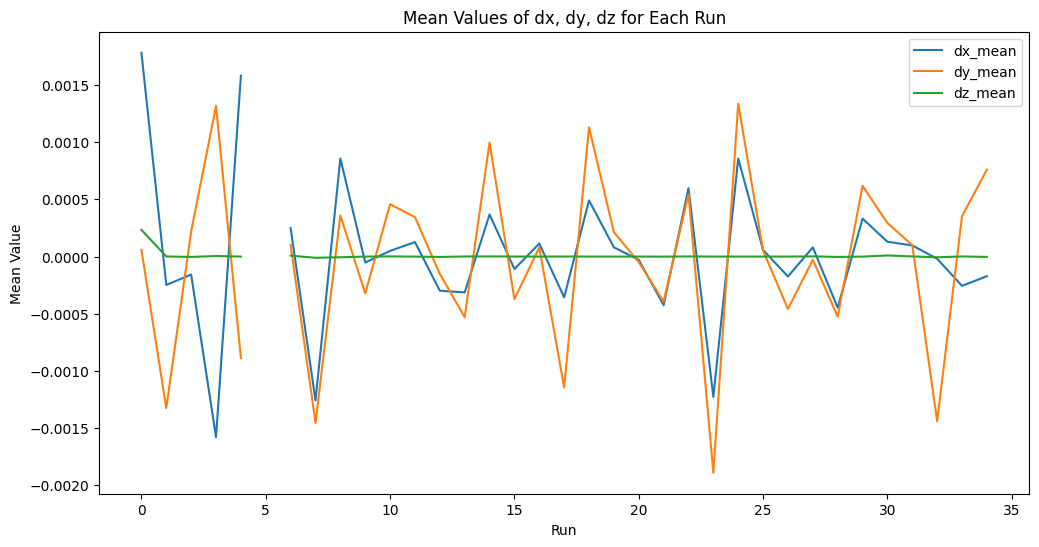

In [32]:
# check the mean of the differences columns for each run
# extremely small values --> moves very little on average..
mean_values = {
    "run": [],
    "dx_mean": [],
    "dy_mean": [],
    "dz_mean": []
}

for i in range(filled_main_frame["run"].max()):
    mean_values["run"].append(i)
    mean_values["dx_mean"].append(filled_main_frame[(filled_main_frame["run"] == i) & (filled_main_frame["robot"] == "drone_1")]["dx"].mean())
    mean_values["dy_mean"].append(filled_main_frame[(filled_main_frame["run"] == i) & (filled_main_frame["robot"] == "drone_1")]["dy"].mean())
    mean_values["dz_mean"].append(filled_main_frame[(filled_main_frame["run"] == i) & (filled_main_frame["robot"] == "drone_1")]["dz"].mean())

mean_df = pd.DataFrame(mean_values)

plt.figure(figsize=(12, 6))
plt.plot(mean_df["run"], mean_df["dx_mean"], label="dx_mean")
plt.plot(mean_df["run"], mean_df["dy_mean"], label="dy_mean")
plt.plot(mean_df["run"], mean_df["dz_mean"], label="dz_mean")
plt.xlabel("Run")
plt.ylabel("Mean Value")
plt.title("Mean Values of dx, dy, dz for Each Run")
plt.legend()
plt.show()

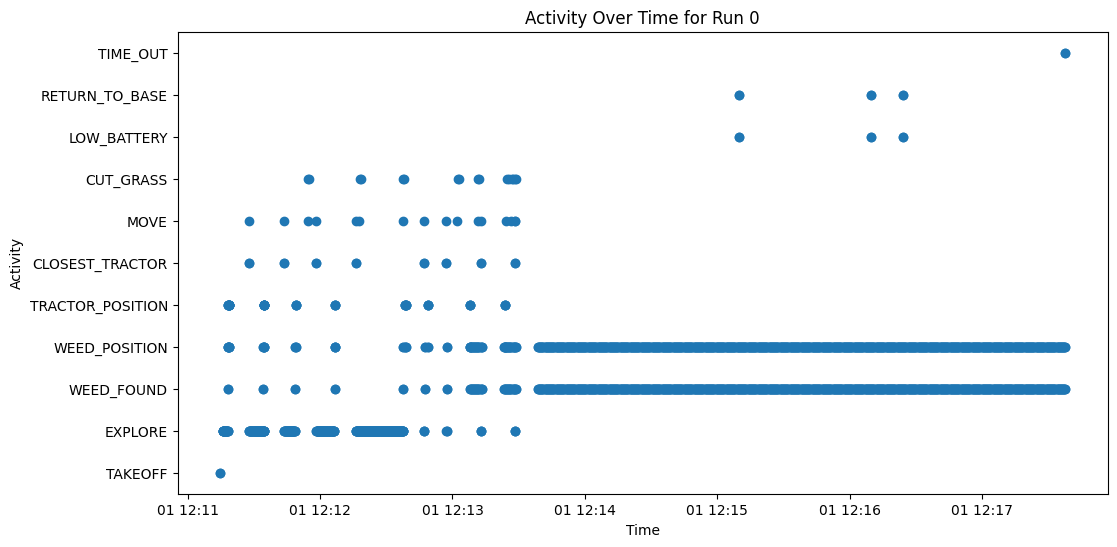

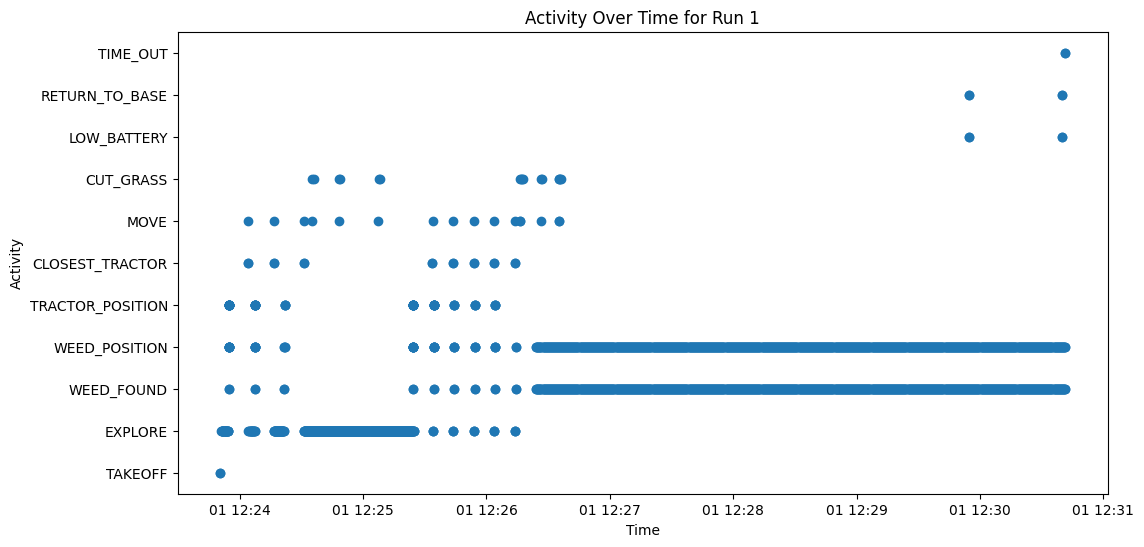

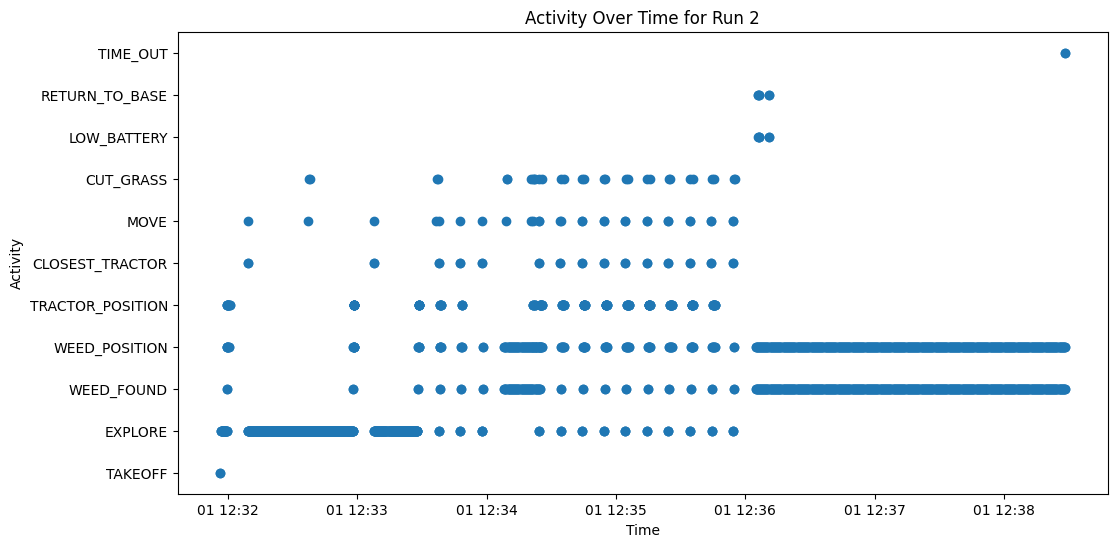

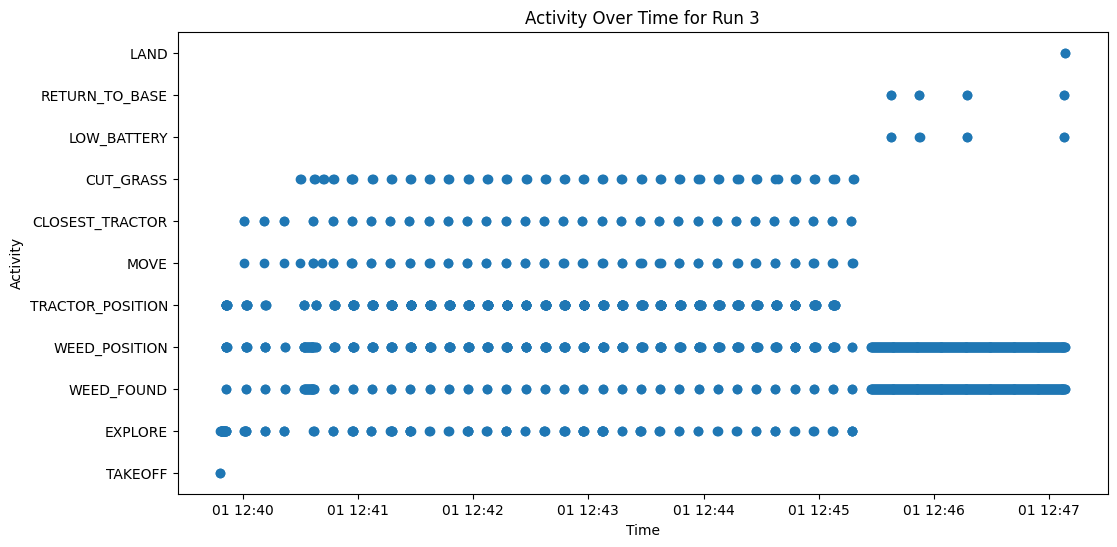

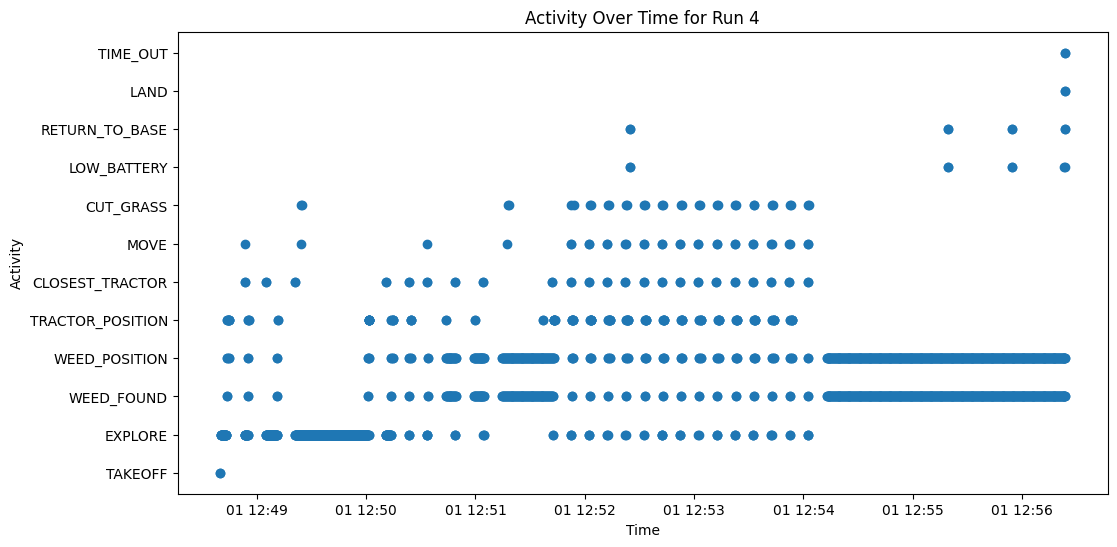

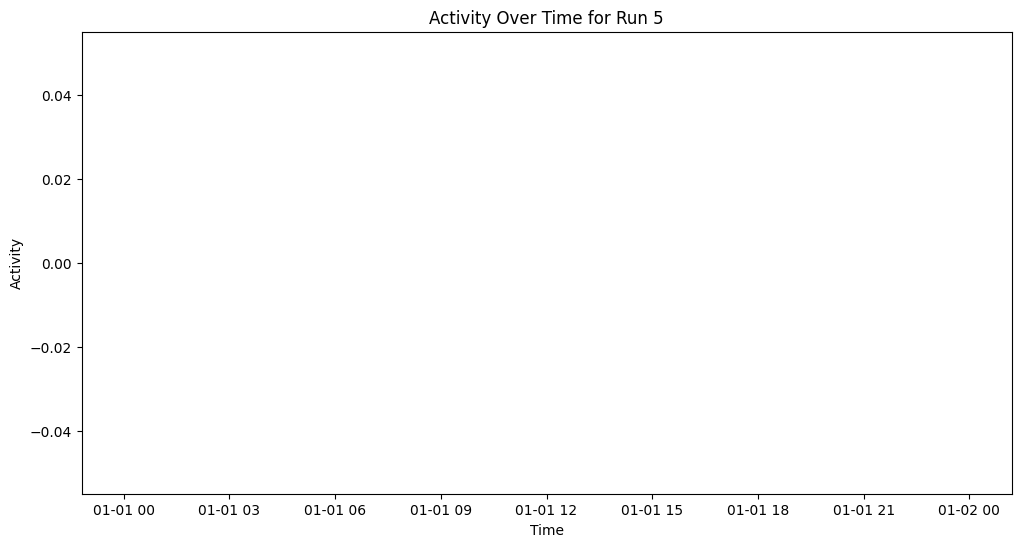

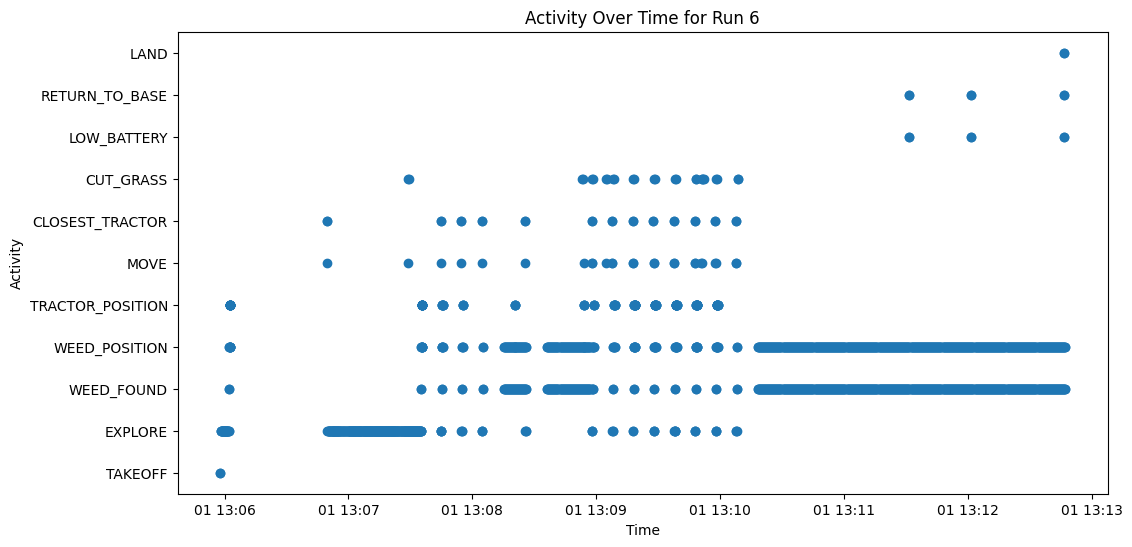

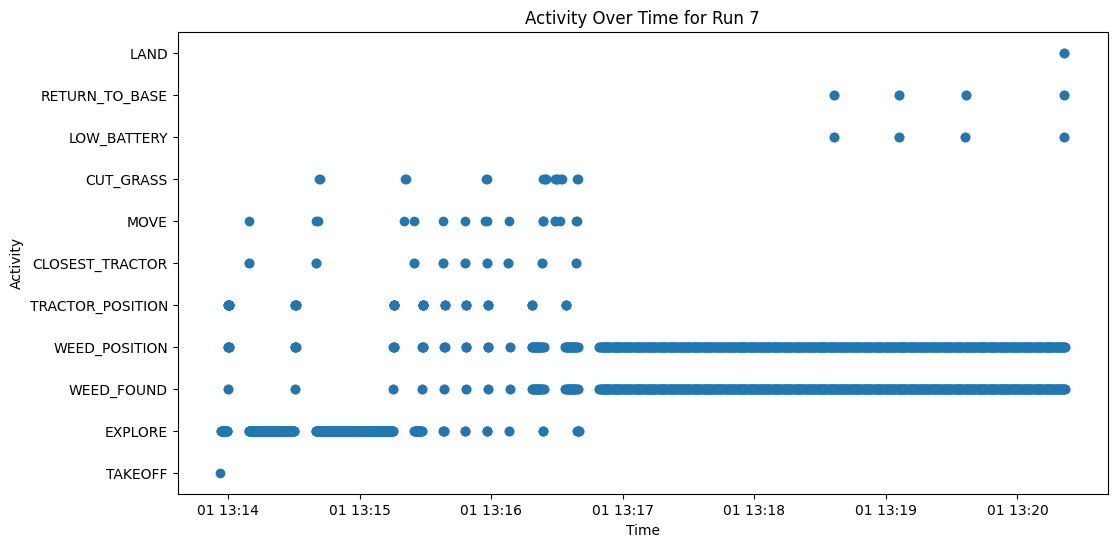

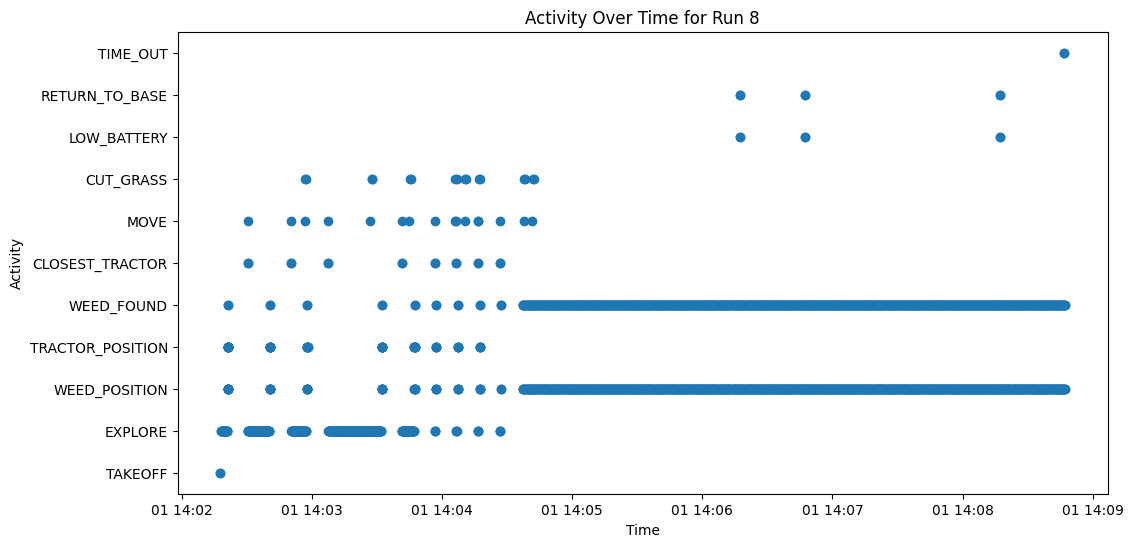

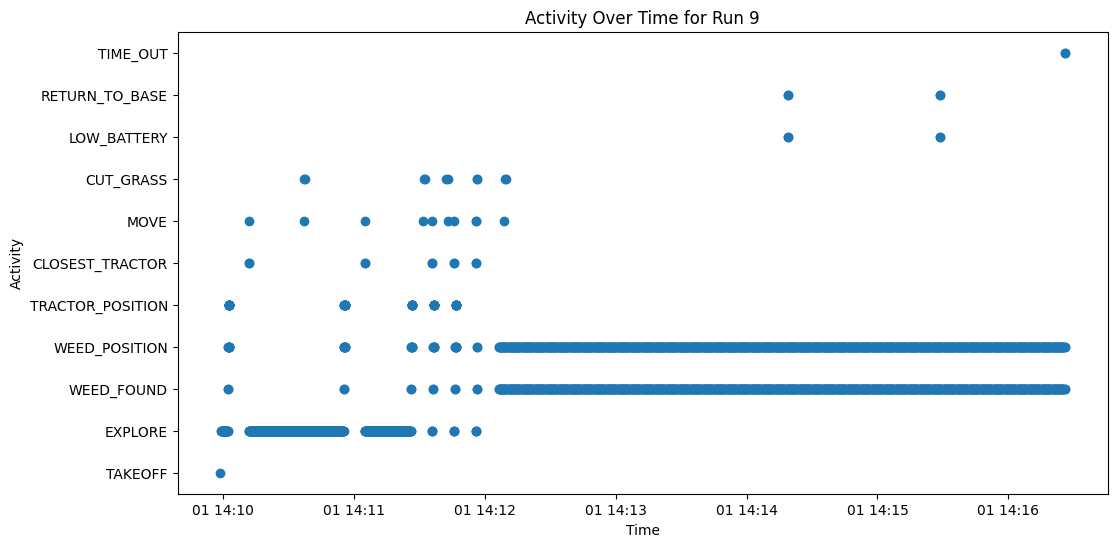

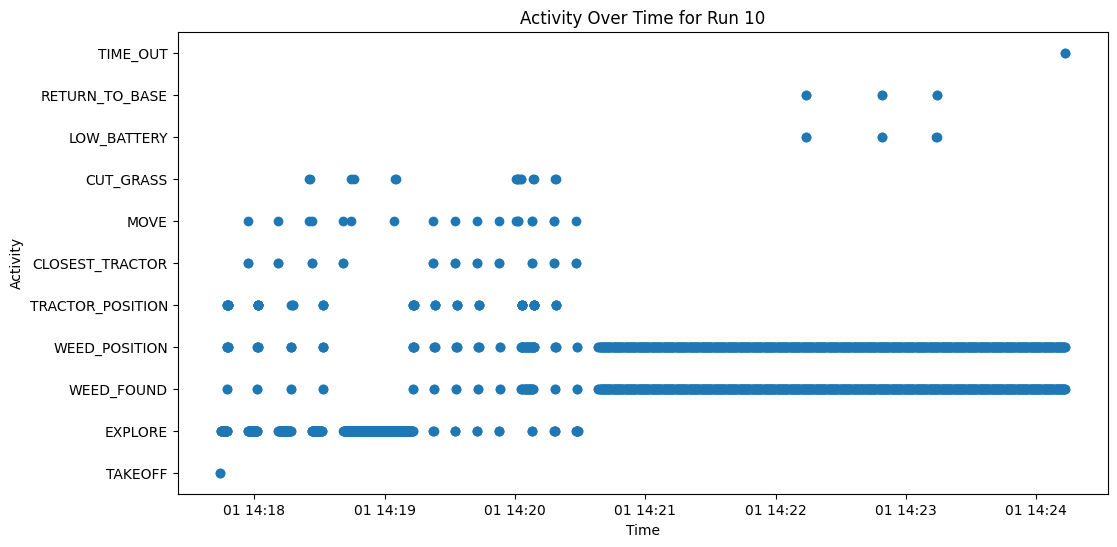

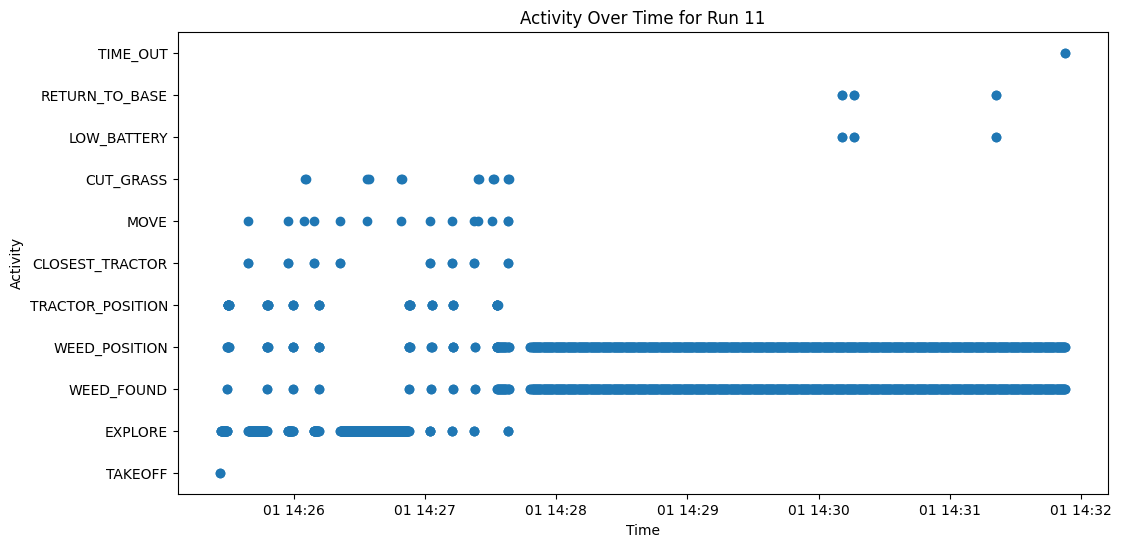

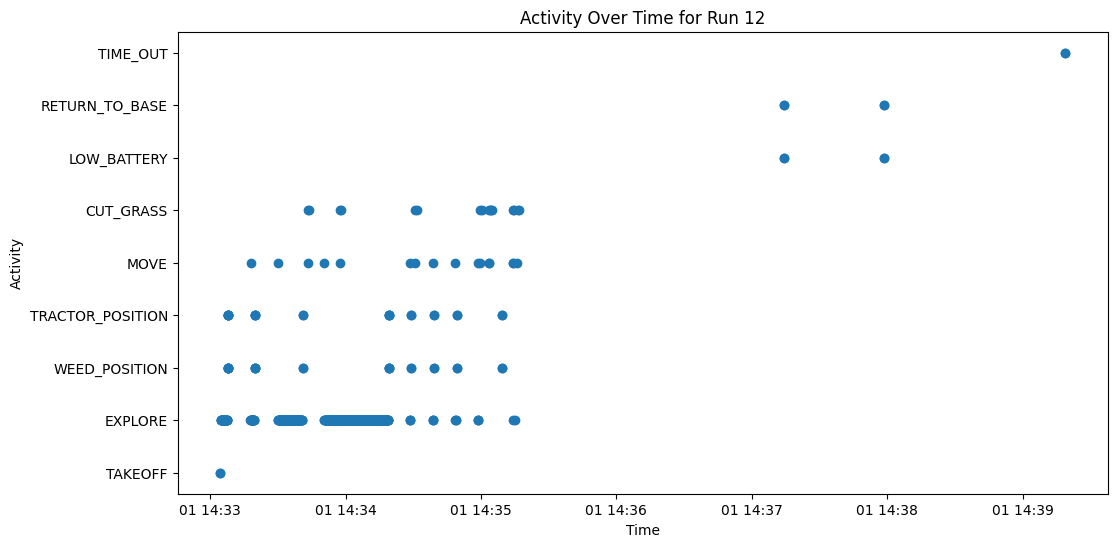

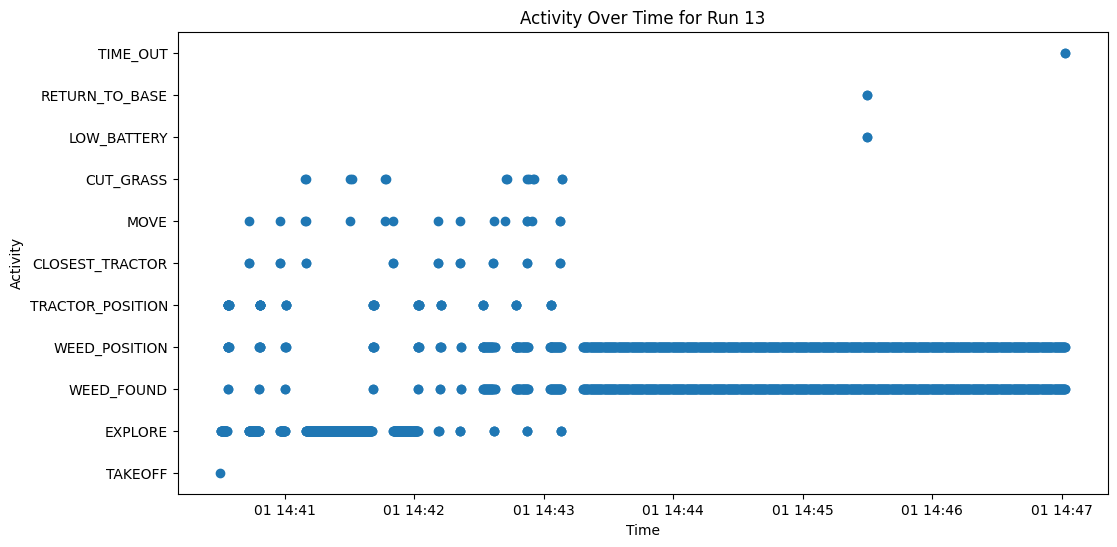

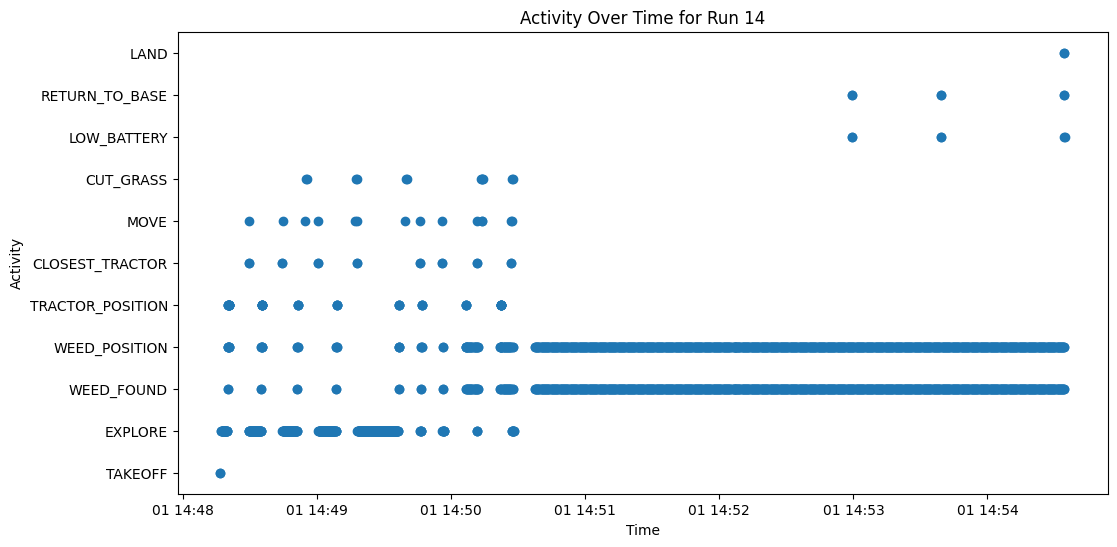

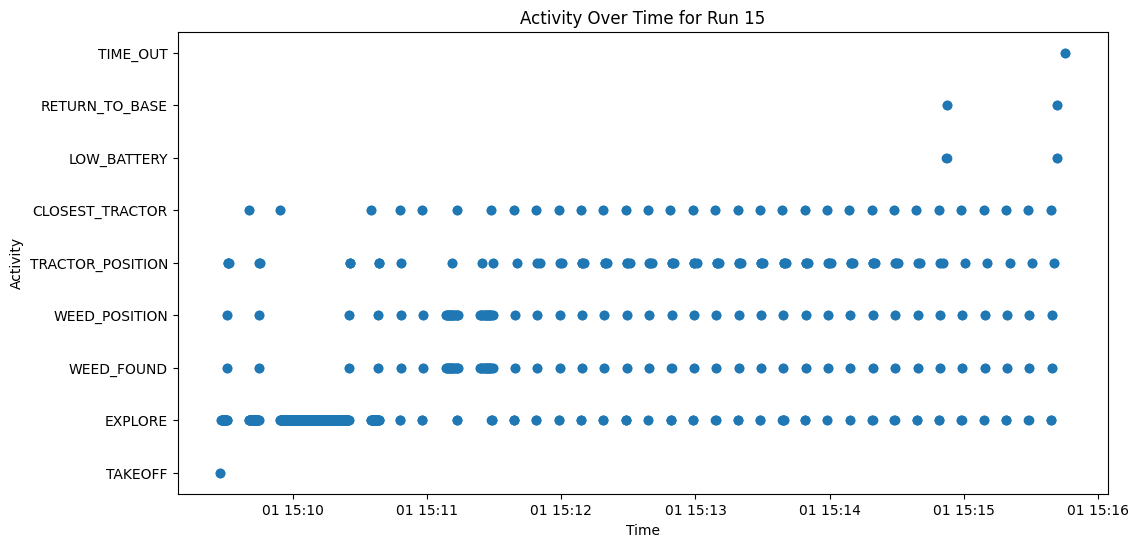

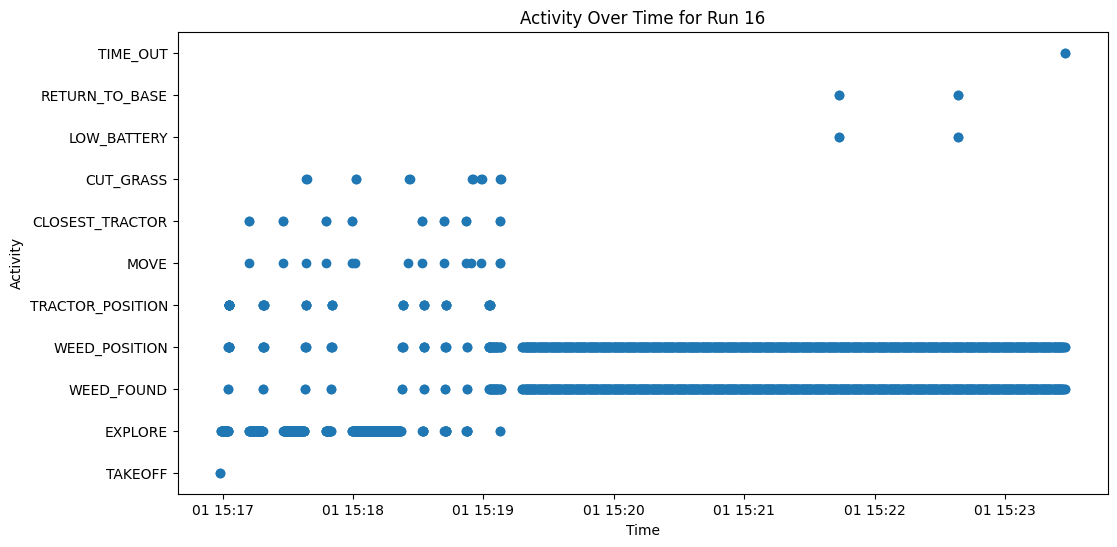

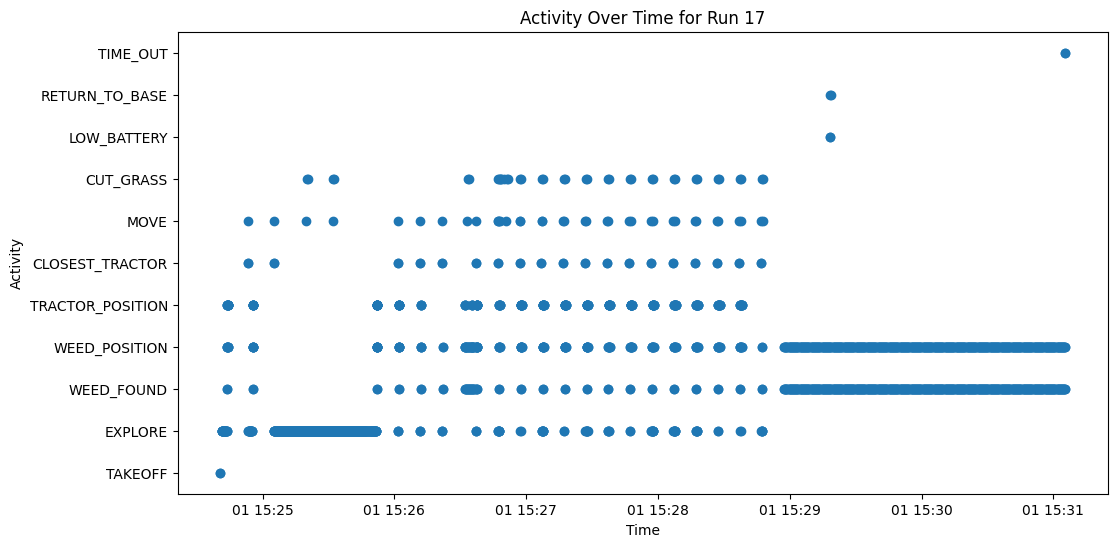

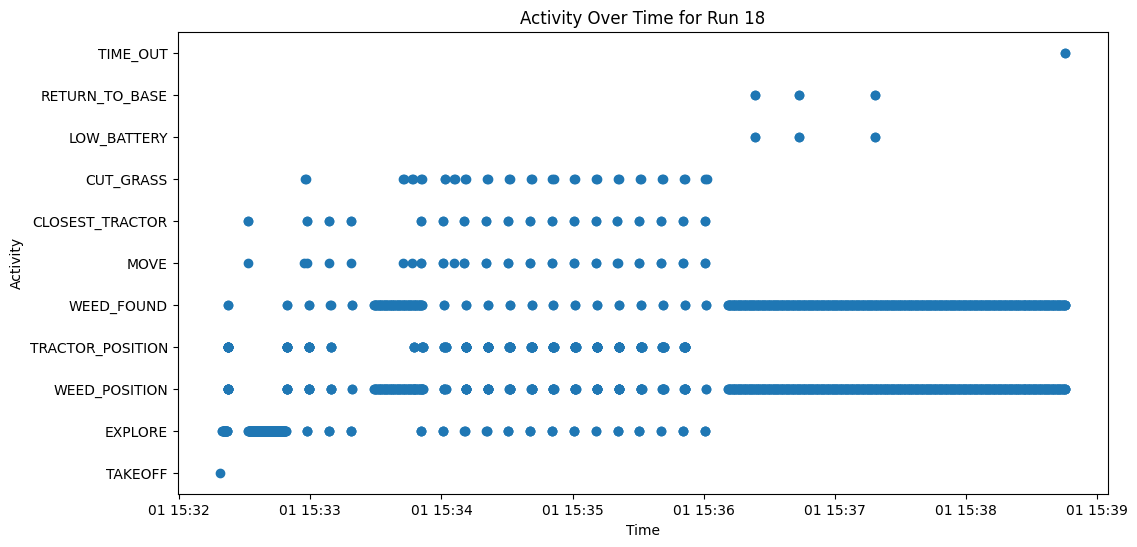

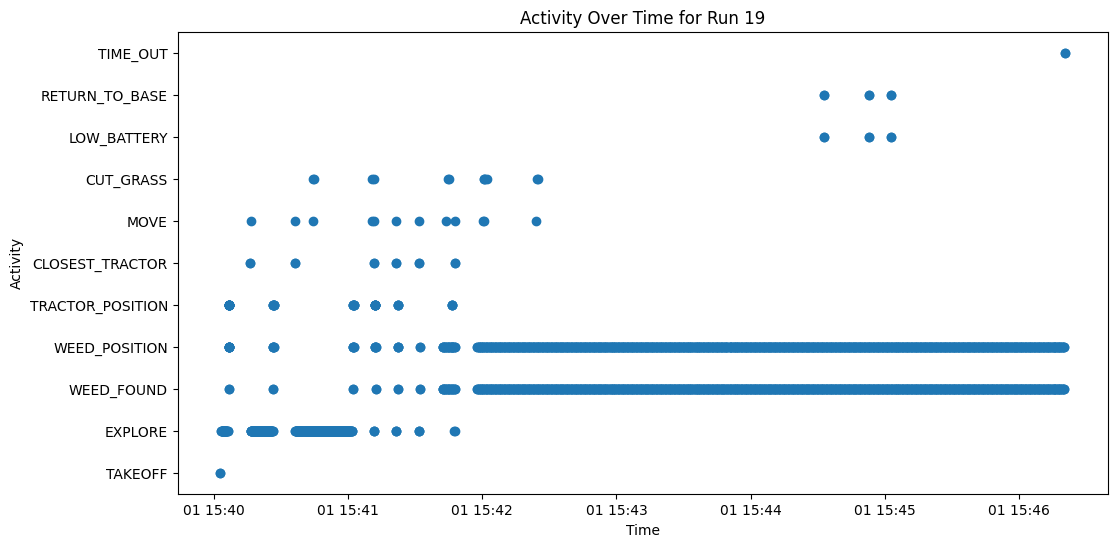

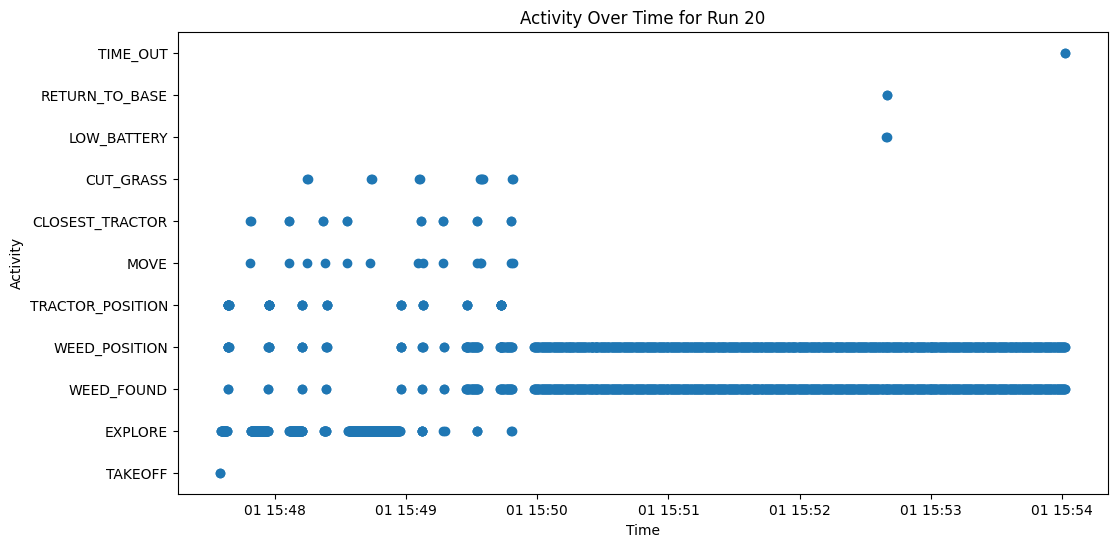

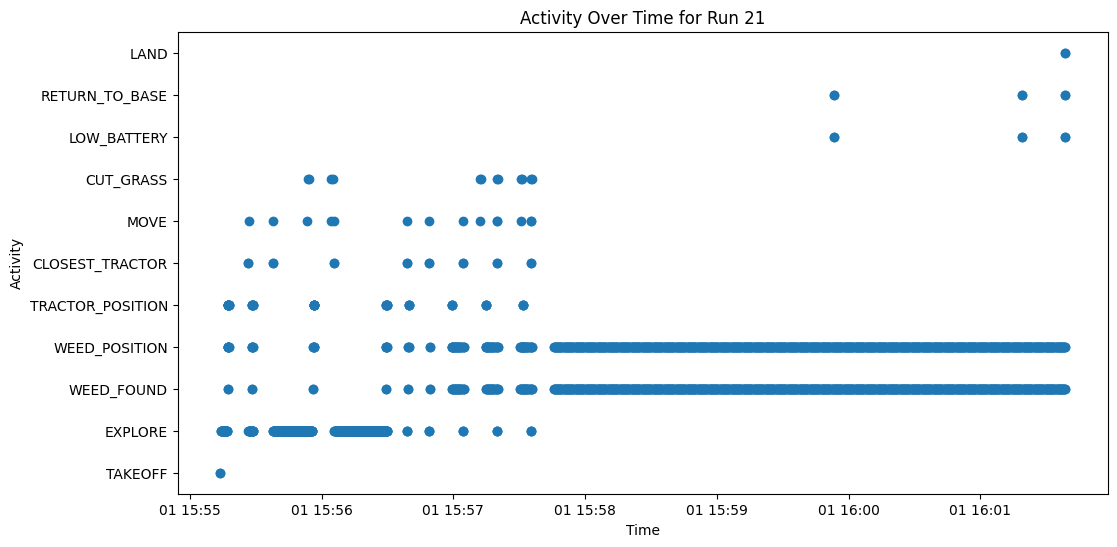

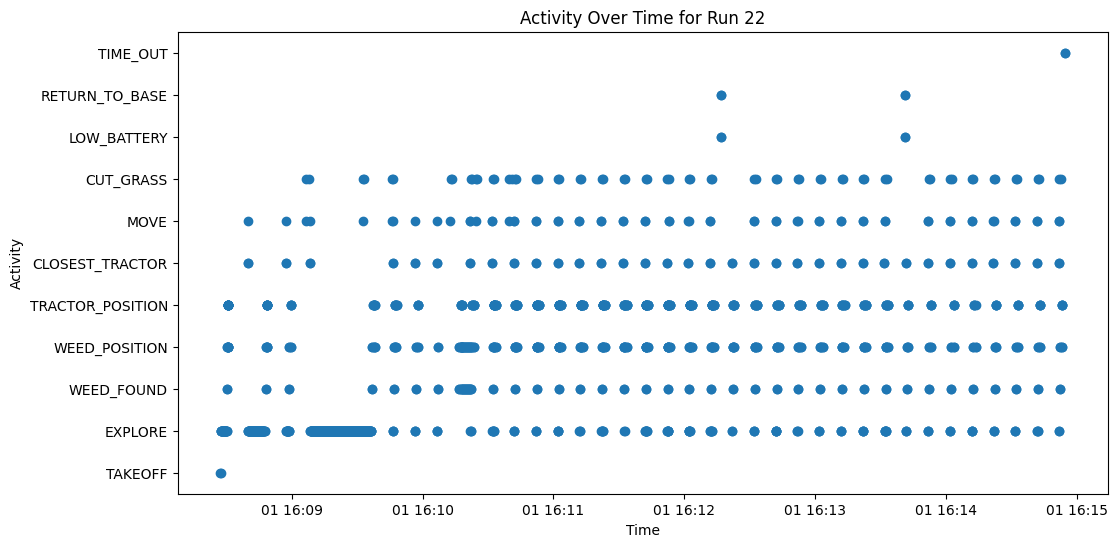

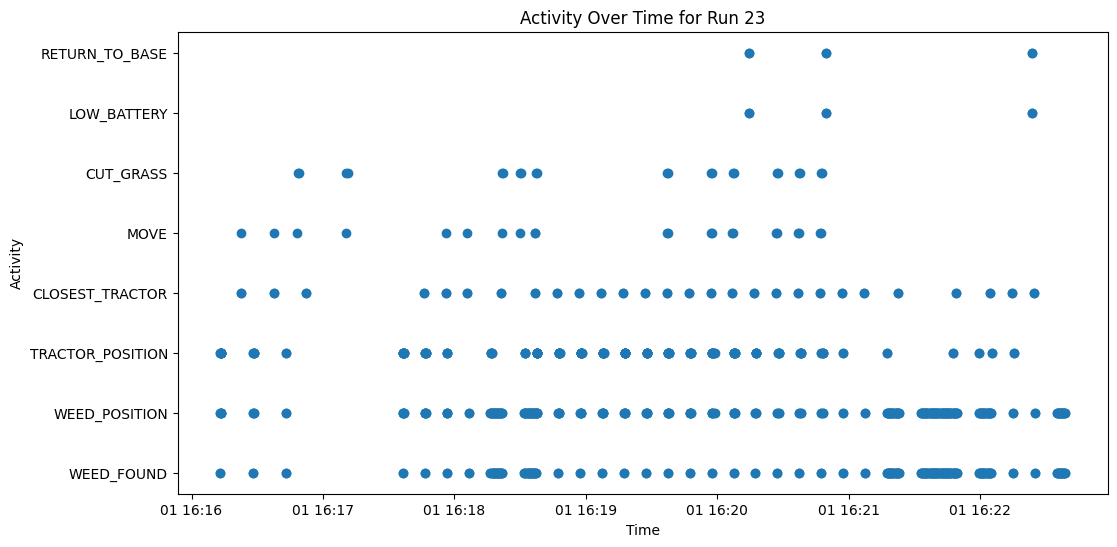

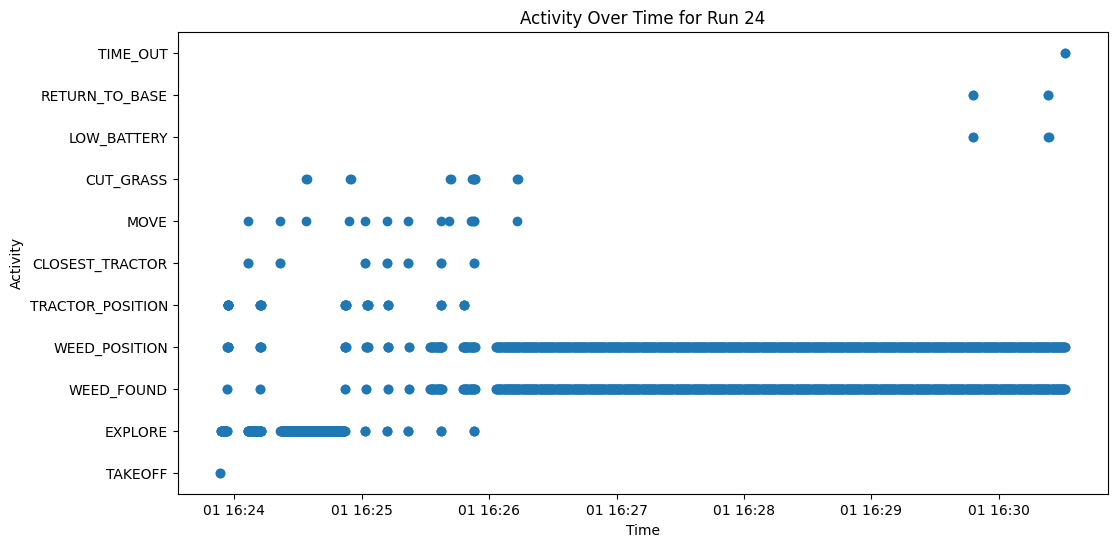

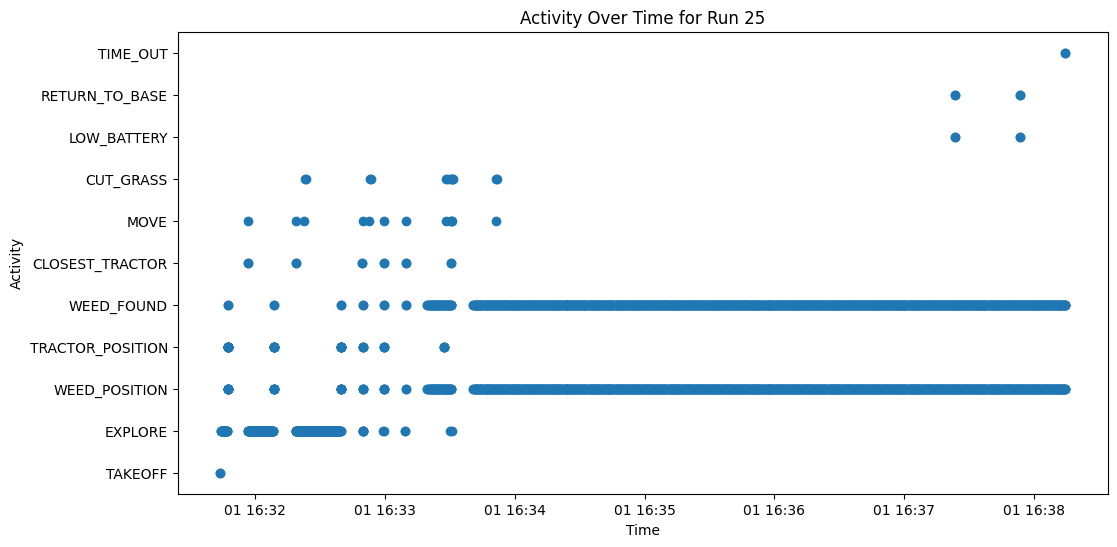

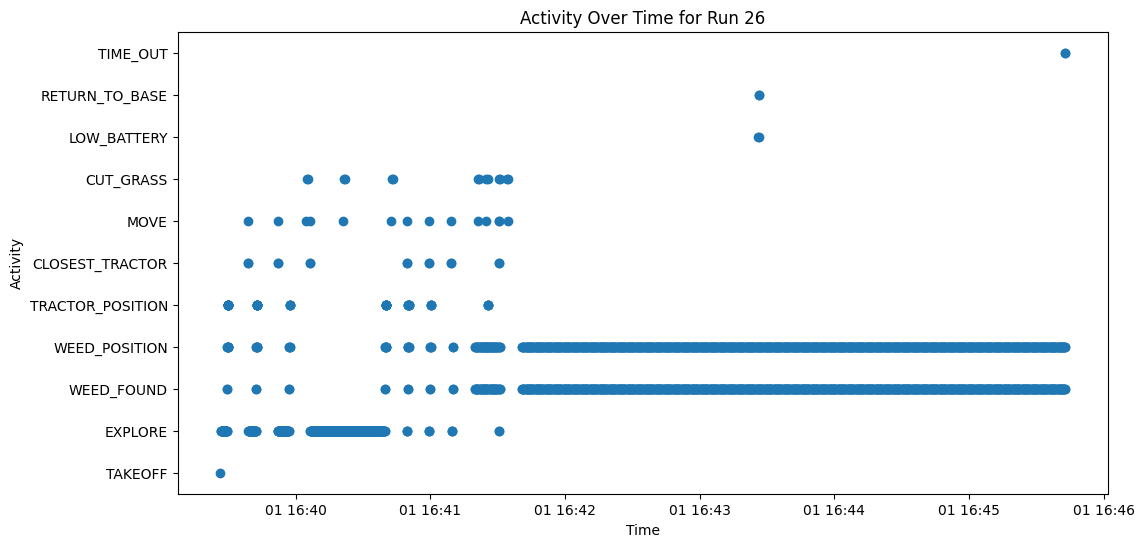

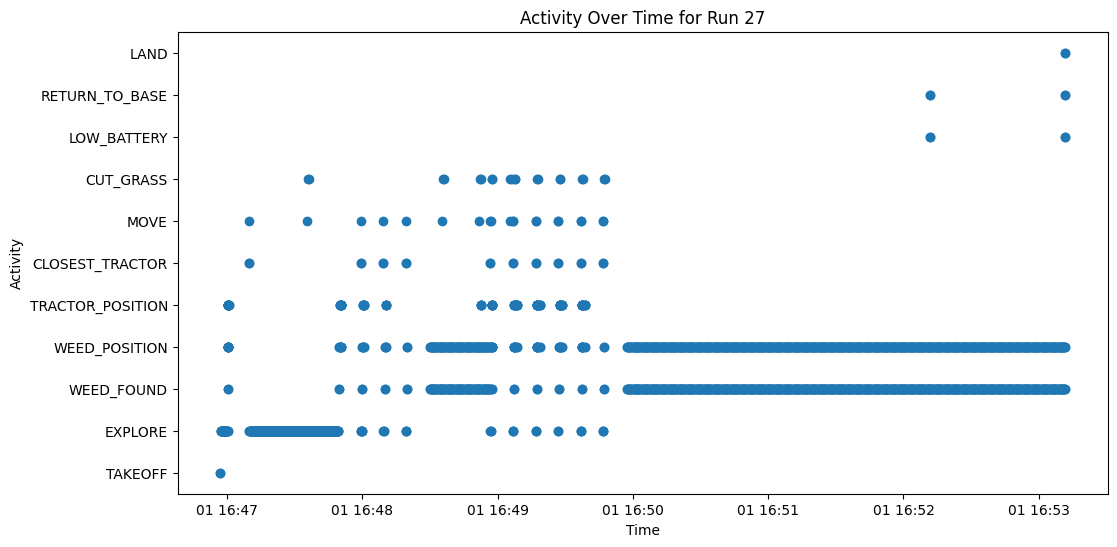

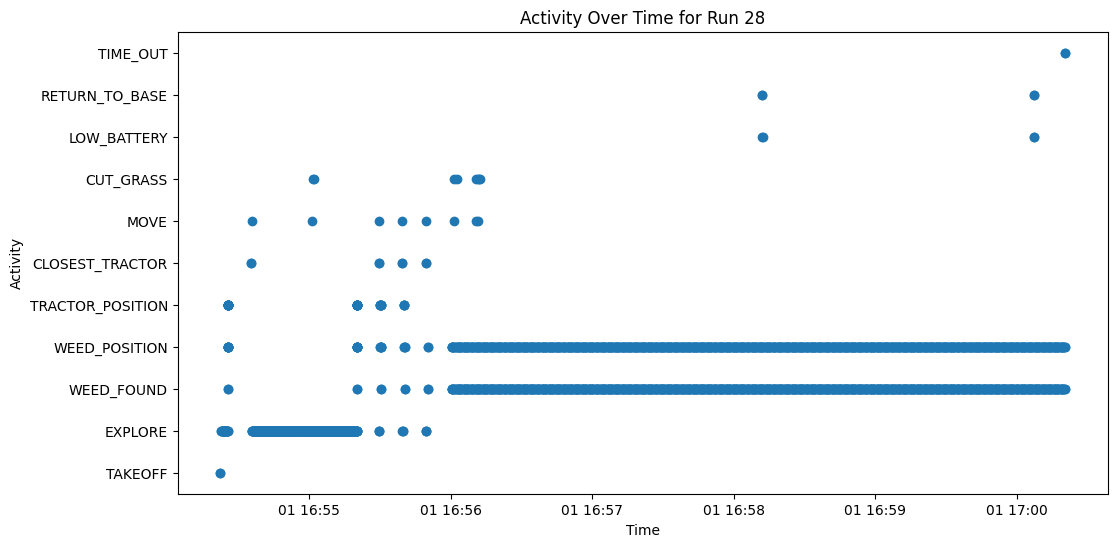

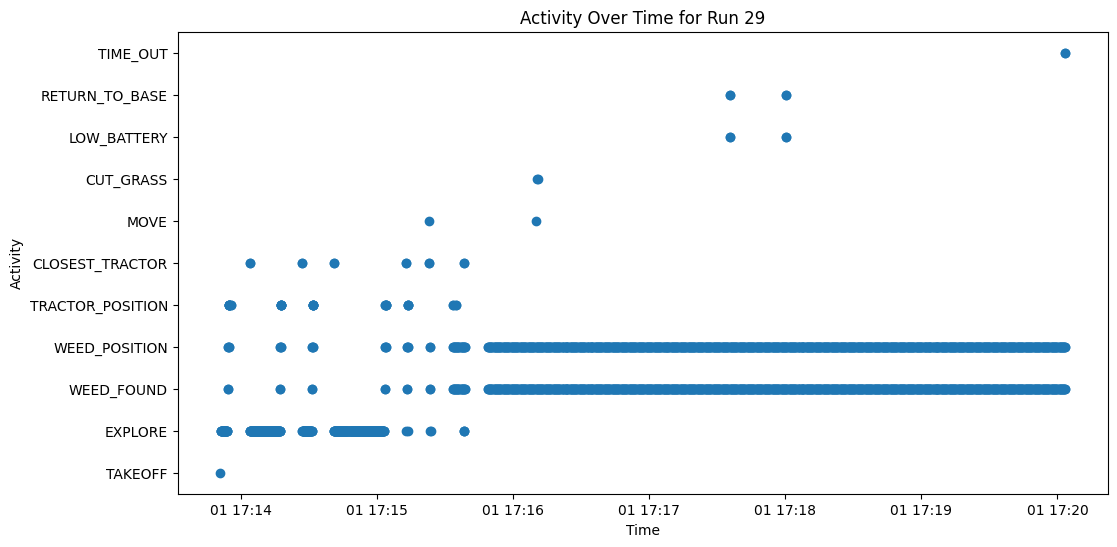

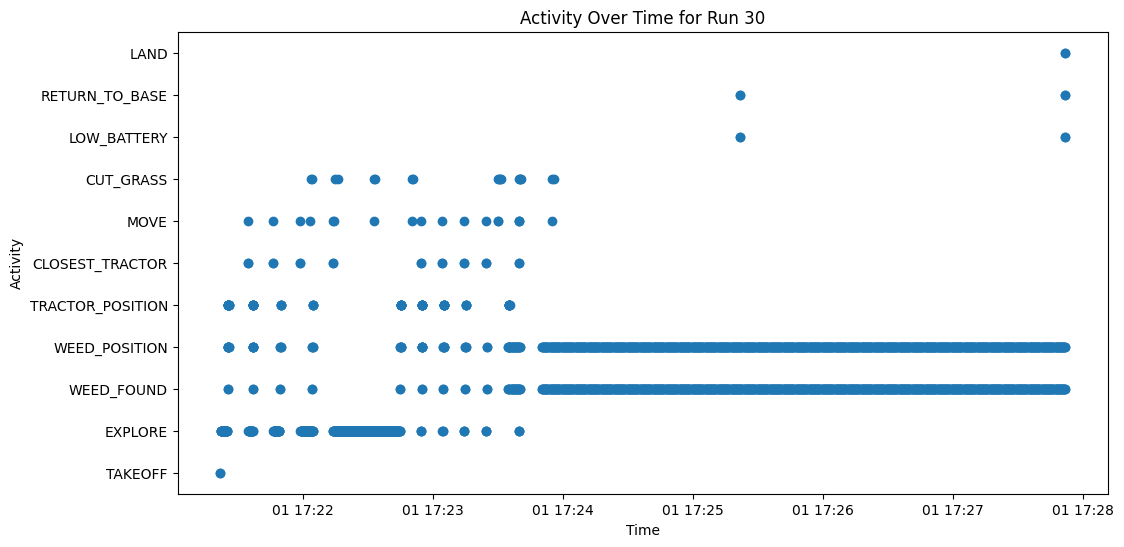

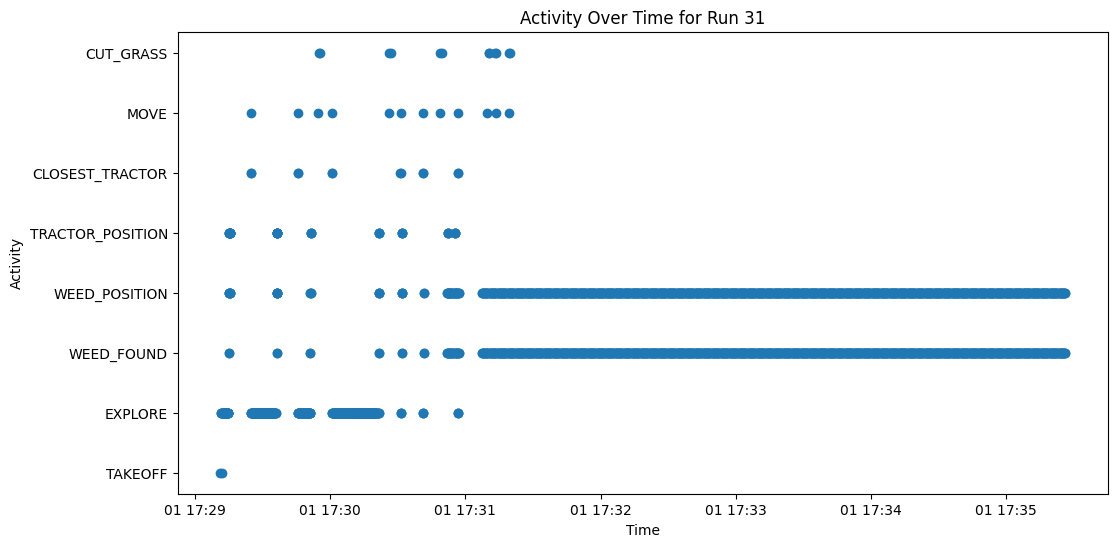

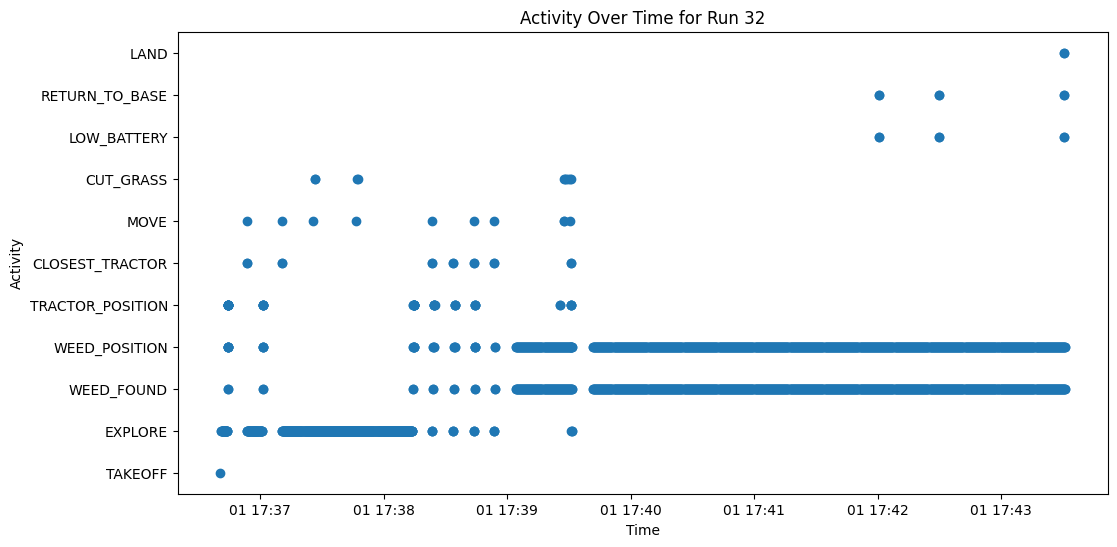

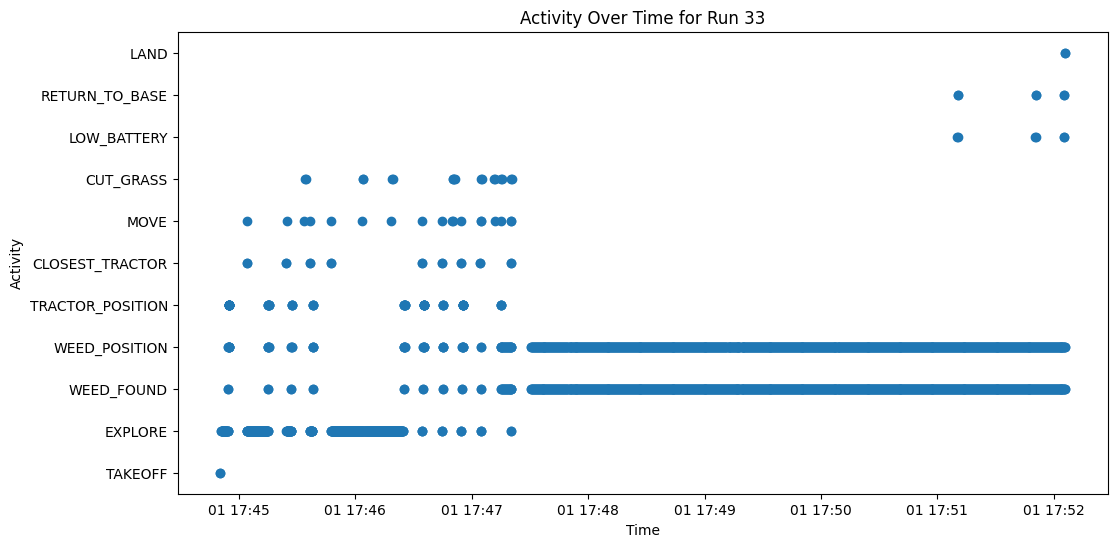

In [33]:
# how to best check the quality of the runs?
# visualize the runs with activity over time for each run

filled_main_frame["time"] = pd.to_datetime(filled_main_frame["time"])

def visualize_activity_over_time(run):
    # visualize_activity_over_time(0)
    run_data = filled_main_frame[filled_main_frame["run"] == run].copy()
    run_data.dropna(subset=["activity"], inplace=True)
    run_data["activity"] = run_data["activity"].astype("category")
    run_data["time"] = pd.to_datetime(run_data["time"])

    plt.figure(figsize=(12, 6))
    plt.plot(run_data["time"], run_data["activity"], marker="o", linestyle="")
    plt.xlabel("Time")
    plt.ylabel("Activity")
    plt.title(f"Activity Over Time for Run {run}")
    plt.show()

for i in range(0, filled_main_frame["run"].max() - 1):
    visualize_activity_over_time(i)




In [34]:
# check time format of filled_main_frame
filled_main_frame["time"] = pd.to_datetime(filled_main_frame["time"])
filled_main_frame["time"].describe()

count                          3177573
mean     2022-08-01 15:24:16.158876160
min      2022-08-01 12:11:06.212093158
25%      2022-08-01 14:15:34.929301760
50%      2022-08-01 15:34:32.673108480
75%      2022-08-01 16:45:25.247719680
max      2022-08-01 18:10:01.677060810
Name: time, dtype: object

In [35]:
# Before this, make the argument, that we need to categorize the payload with the elements we have

# Define the payload transformation function to be used later
def has_payload(payload):
    if payload is None or pd.isna(payload) or payload == "":
        return "no_payload"
    if "/tractor" in str(payload):
        return "/tractor" # most likely to be CUT_GRASS
    elif "name" in str(payload):
        return "name" # most likely to be CLOSTEST_TRACTOR
    elif "header: tractor" in str(payload):
        return "header: tractor" # most likely to be TRACTOR_POSITION
    elif "weed" in str(payload):
        return "weed" # most likely to be WEED_POSITION
    else:
        return "unknown"

In [38]:
# create a time from the start of the simulation for each run
# filled_main_frame["time"].head()

for i in range(filled_main_frame["run"].max()):
    # create new features minutes_since_start
    filled_main_frame.loc[filled_main_frame["run"] == i, "minutes_since_start"] = (filled_main_frame.loc[filled_main_frame["run"] == i, "time"] - filled_main_frame.loc[filled_main_frame["run"] == i, "time"].min()).dt.total_seconds() / 60

filled_main_frame.head()

,time,activity,lifecycle,payload,robot,x,y,z,run,dz,dy,dx,minutes_since_start
0,2022-08-01 12:11:06.212093158,NaN,NaN,NaN,tractor_1,0.000097,1.000001,0.082138,0,NaN,NaN,NaN,0.000000
1,2022-08-01 12:11:06.226733908,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0,2.915730e-06,-8.785570e-08,4.064965e-06,0.000244
2,2022-08-01 12:11:06.236381231,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0,5.278565e-08,-9.768736e-08,-1.982829e-07,0.000405
3,2022-08-01 12:11:06.247522933,NaN,NaN,NaN,tractor_1,0.000101,1.000001,0.082141,0,1.568916e-09,-2.578775e-08,-3.152928e-07,0.000590
4,2022-08-01 12:11:06.258292874,NaN,NaN,NaN,tractor_1,0.000100,1.000001,0.082141,0,-2.556351e-09,-1.819765e-08,-3.177586e-07,0.000770


In [41]:
# add has payload feature to filled main frame
filled_main_frame["has_payload"] = filled_main_frame["payload"].apply(has_payload)

In [45]:
# propagate TAKEOFF until the first explore activity for each run
for i in range(filled_main_frame["run"].max()):
    print(f"Currently processing run {i}")
    if i == 5 or i == 23: # run 5 is damaged and run 23 does for soome reason not have a TAKEOFF activity
        continue
    first_takeoff = filled_main_frame[(filled_main_frame["run"] == i) & (filled_main_frame["activity"] == "TAKEOFF")].index[0]
    first_explore = filled_main_frame[(filled_main_frame["run"] == i) & (filled_main_frame["activity"] == "EXPLORE")].index[0]

    # fill all drone rows with TAKEOFF activity until the first EXPLORE activity only if the robot is drone_1
    drone_1_indeces = filled_main_frame[(filled_main_frame['robot'] == 'drone_1') & (pd.isna(filled_main_frame["activity"]))].index
    indices = drone_1_indeces[(drone_1_indeces >= first_takeoff) & (drone_1_indeces <= first_explore)]
    filled_main_frame.loc[indices, 'activity'] = 'TAKEOFF'

Currently processing run 0
Currently processing run 1
Currently processing run 2
Currently processing run 3
Currently processing run 4
Currently processing run 5
Currently processing run 6
Currently processing run 7
Currently processing run 8
Currently processing run 9
Currently processing run 10
Currently processing run 11
Currently processing run 12
Currently processing run 13
Currently processing run 14
Currently processing run 15
Currently processing run 16
Currently processing run 17
Currently processing run 18
Currently processing run 19
Currently processing run 20
Currently processing run 21
Currently processing run 22
Currently processing run 23
Currently processing run 24
Currently processing run 25
Currently processing run 26
Currently processing run 27
Currently processing run 28
Currently processing run 29
Currently processing run 30
Currently processing run 31
Currently processing run 32
Currently processing run 33
Currently processing run 34


In [46]:
# export the filled_main_frame to a csv file
filled_main_frame.to_csv(os.path.join(tale_processed_location, "filled_main_frame.csv"), index=False)

In [40]:
filled_main_frame.columns

Index(['time', 'activity', 'lifecycle', 'payload', 'robot', 'x', 'y', 'z',
       'run', 'dz', 'dy', 'dx', 'minutes_since_start'],
      dtype='object')